# Exploratory Data Analysis

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CO2 Emissions_Canada_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Number of Gears
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,196,5
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,244,6


In [3]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (6041, 12)


In [4]:
# Data type of each variable
print(df.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
CO2 Emissions(g/km)                   int64
Number of Gears                       int64
dtype: object


In [5]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6041 non-null   object 
 1   Model                             6041 non-null   object 
 2   Vehicle Class                     6041 non-null   object 
 3   Engine Size(L)                    6041 non-null   float64
 4   Cylinders                         6041 non-null   int64  
 5   Transmission                      6041 non-null   object 
 6   Fuel Type                         6041 non-null   object 
 7   Fuel Consumption City (L/100 km)  6041 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6041 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6041 non-null   float64
 10  CO2 Emissions(g/km)               6041 non-null   int64  
 11  Number of Gears                   6041 non-null   int64  
dtypes: flo

## Numerical Data

We first look at the numerical data: 
> Engine Size(L)  
> Cylinders  
> Fuel Consumption City (L/100 km)  
> Fuel Consumption Hwy (L/100 km)  
> Fuel Consumption Comb (L/100 km)      
> CO2 Emissions(g/km)  
> Number of Gears

### CO2 Emissions
Let us consider our response variable CO2 emissions. 

In [6]:
# Extract CO2 Emissions
emissions = pd.DataFrame(df['CO2 Emissions(g/km)'])
print("Data type : ", type(emissions))
print("Data dims : ", emissions.size)
emissions.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  6041


,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244


We will look at the distribution of CO2 emissions.

In [7]:
emissions.describe()

,CO2 Emissions(g/km)
count,6041.000000
mean,254.256580
std,57.754273
min,96.000000
25%,211.000000
50%,248.000000
75%,291.000000
max,522.000000


<Axes: >

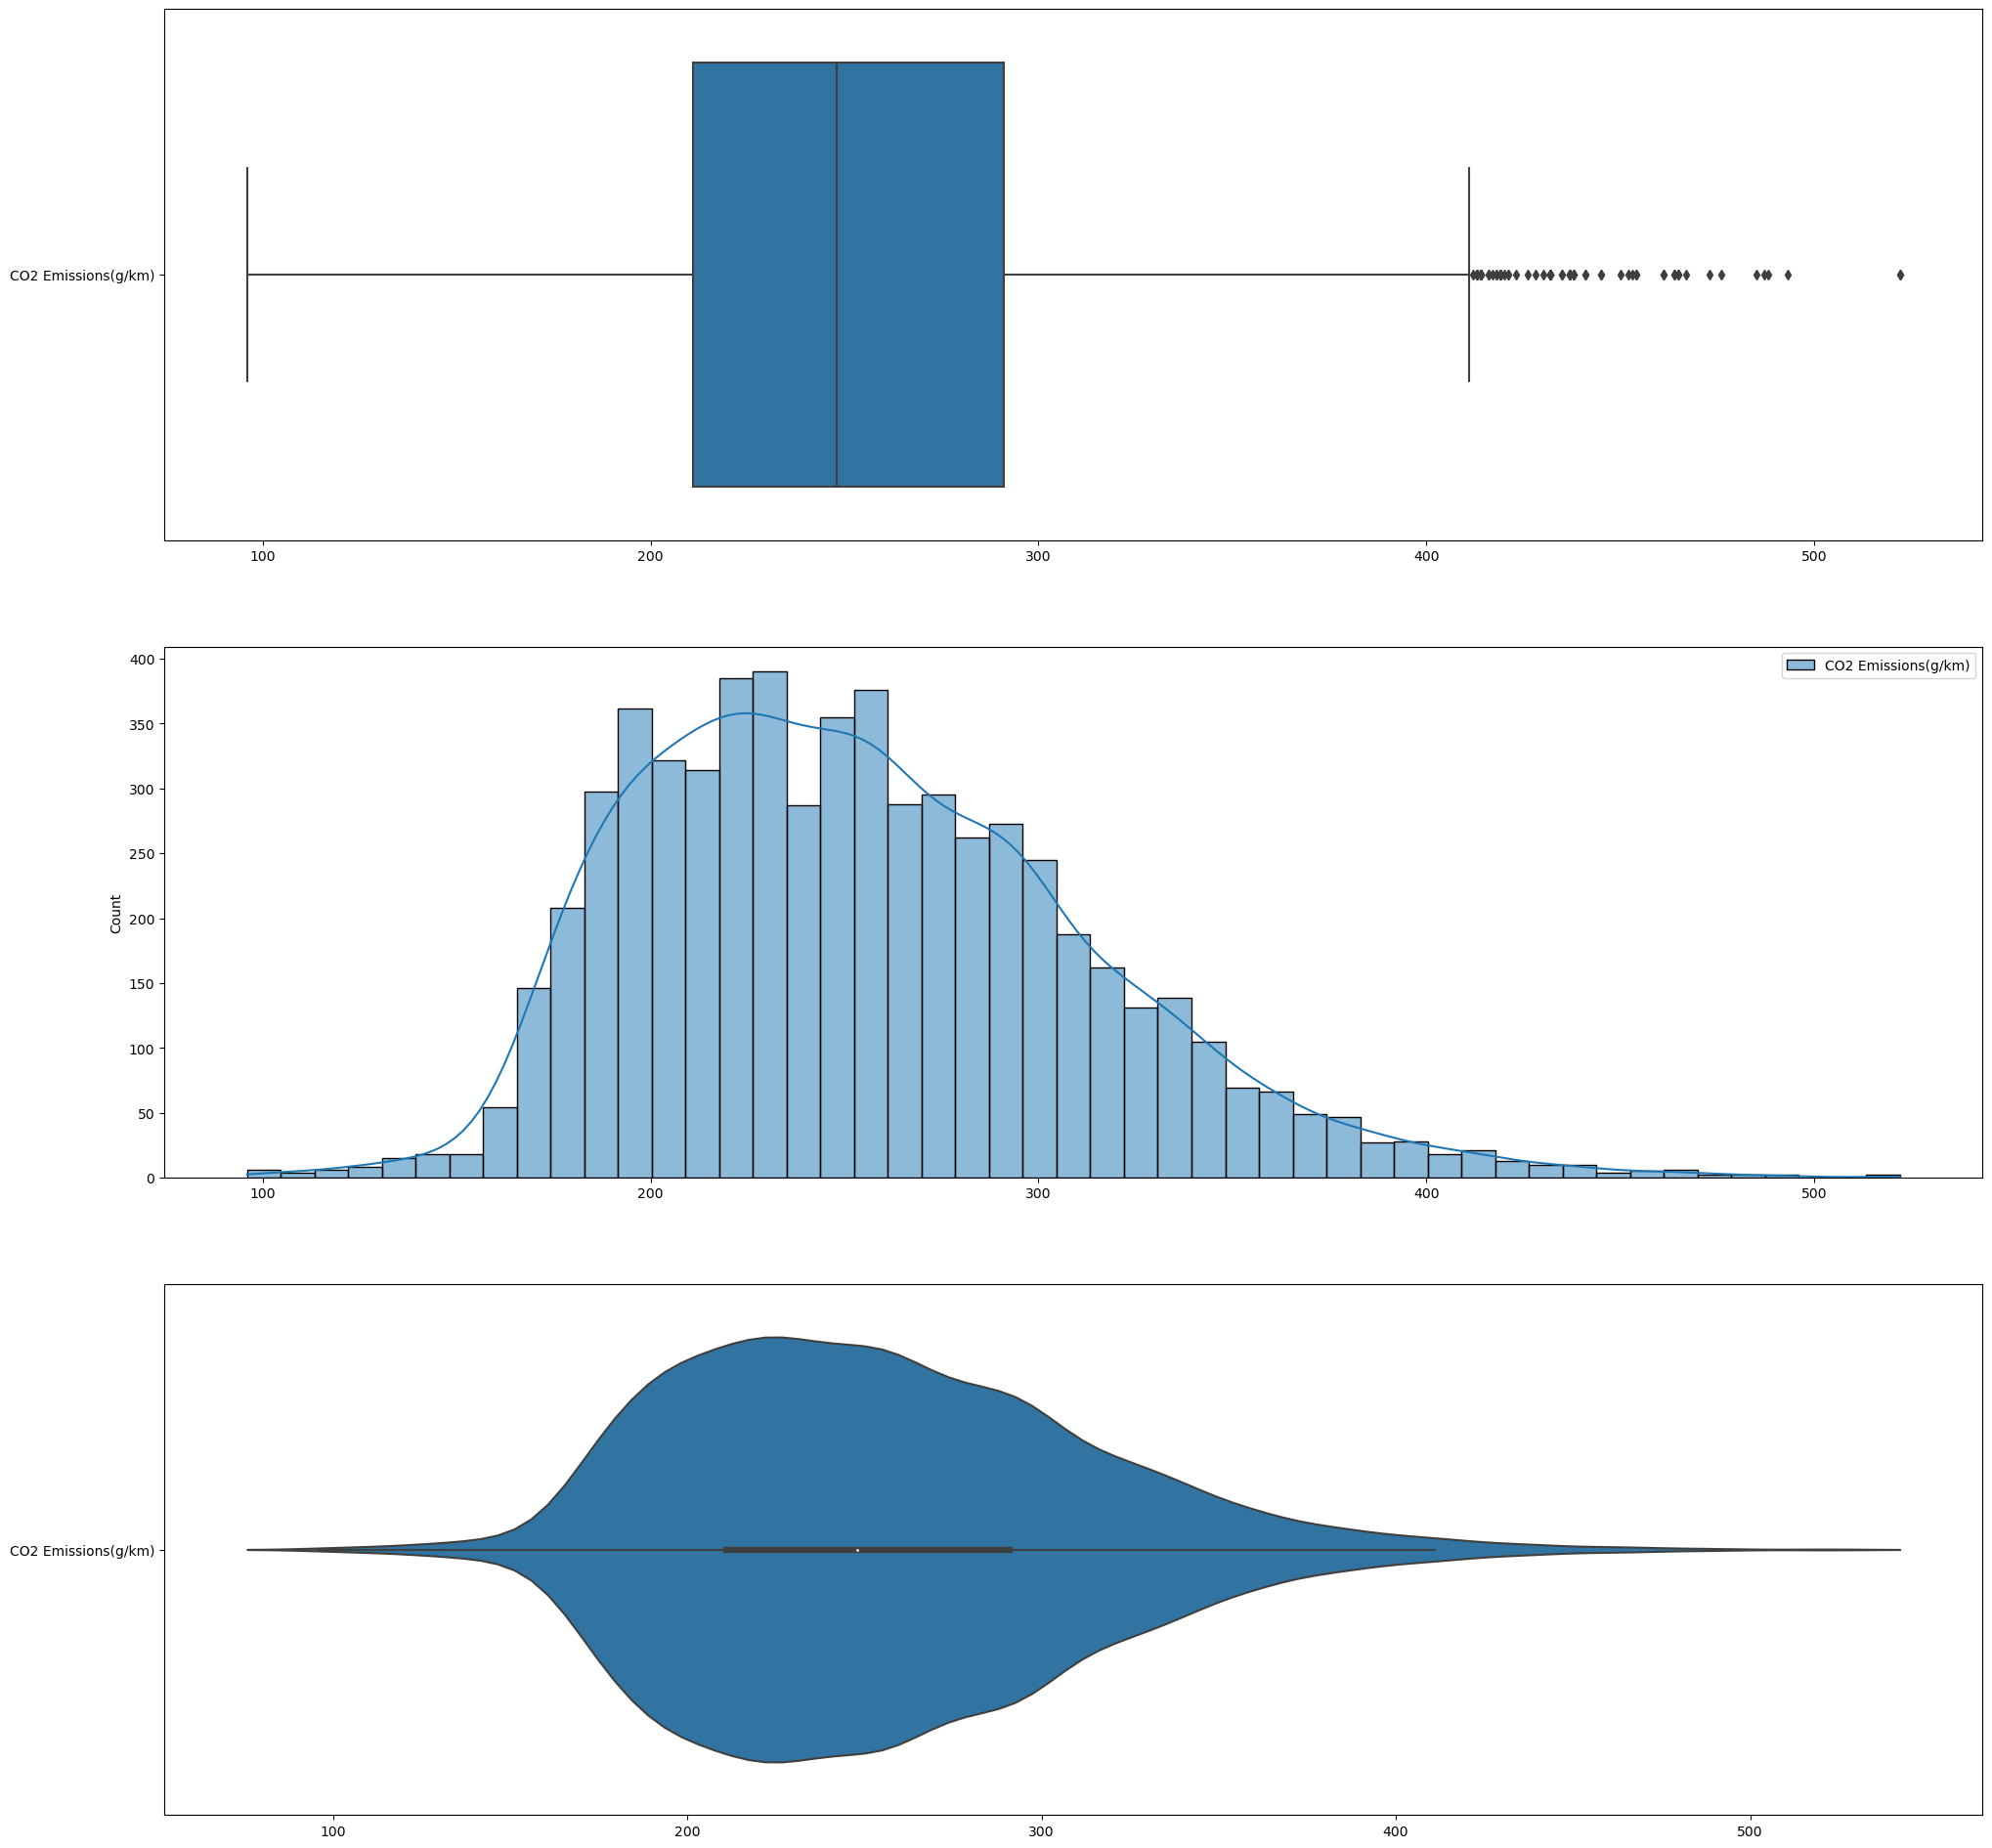

In [8]:
# Display the boxplot, histogram and violin plot
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = emissions, orient = "h", ax = axes[0])
sb.histplot(data = emissions,ax = axes[1],kde=True)
sb.violinplot(data = emissions, orient = "h", ax = axes[2])

The graphs for CO2 Emission is skewed positive. It can be observed from the boxplot that there are some outliers beyond the upper whisker while there are no outliers below the lower whisker. 

We will remove the outliers for a cleaner dataset.

In [9]:
# Calculate quartiles and interquartile range for SalePrice
q1_Emissions = emissions.quantile(0.25)
q3_Emissions = emissions.quantile(0.75)
interquartile_range_Emissions = q3_Emissions - q1_Emissions

# Define the lower and upper whisker for SalePrice
lower_whisker_Emissions = q1_Emissions - 1.5 * interquartile_range_Emissions
upper_whisker_Emissions = q3_Emissions + 1.5 * interquartile_range_Emissions

# Filter the DataFrame to remove outliers
df_filtered = df[(df['CO2 Emissions(g/km)'] >= lower_whisker_Emissions[0]) & (df['CO2 Emissions(g/km)'] <= upper_whisker_Emissions[0])]

# Print the shape of the original and filtered DataFrame to see the changes
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

Original DataFrame shape: (6041, 12)
Filtered DataFrame shape: (5969, 12)


<Axes: >

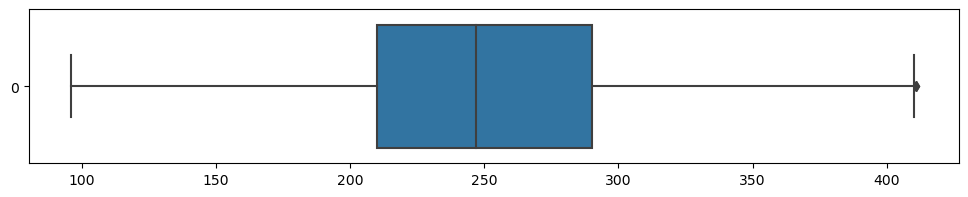

In [10]:
# Display the boxplot after removing outliers using the interquartile range method
f, axes = plt.subplots(1,figsize=(12, 2))
sb.boxplot(data = df_filtered["CO2 Emissions(g/km)"], orient = "h")

There are still outliers even after removing values based on the interquartile range (IQR) method. Hence, we will explore another method using z-score. Z-score indicates how many standard deviations a data point is from the mean.

Before that let us check on the skewness for CO2 Emission as the z-score method only works with data that is completely or close to normally distribution.

In [11]:
df['CO2 Emissions(g/km)'].skew()

0.6392713740130931

The data has a skewness of 0.6 which is mildly positively skewed, thus following close to a normal distribution. We will attempt to use the z-score method.

Original DataFrame shape: (6041, 13)
Filtered DataFrame shape: (5965, 12)


<Axes: >

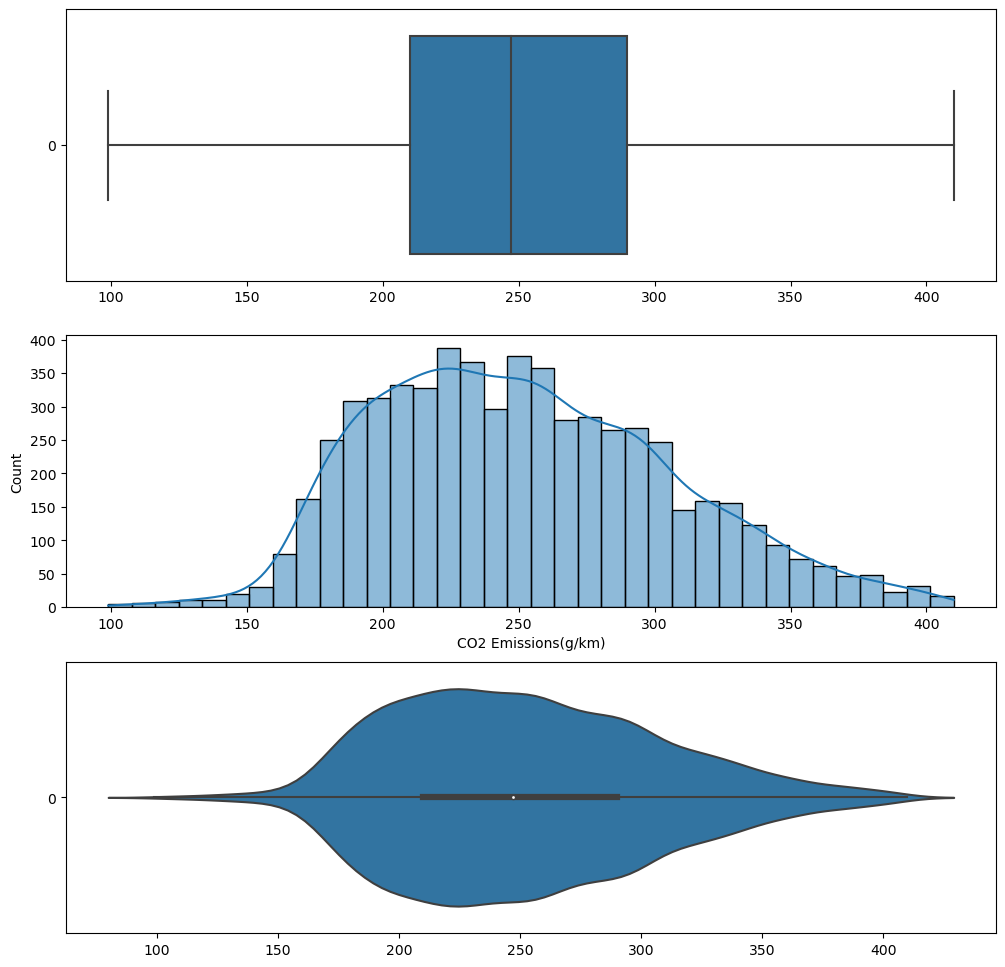

In [12]:
z_threshold = 2.7  # Adjust as needed

# Calculate mean and standard deviation
mean = df['CO2 Emissions(g/km)'].mean()
std_dev = df['CO2 Emissions(g/km)'].std()

# Calculate z-scores
df['z_score'] = (df['CO2 Emissions(g/km)'] - mean) / std_dev

# Remove outliers
df_filtered2 = df[abs(df['z_score']) <= z_threshold]

# Remove the 'z_score' column 
df_filtered2 = df_filtered2.copy()
df_filtered2.drop(columns=['z_score'], inplace=True)

# Print the shape of the original and filtered DataFrame to see the changes
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered2.shape)

# Display the boxplot, histogram and violin plot after removing outliers using the z-score method
f, axes = plt.subplots(3,figsize=(12, 12))
sb.boxplot(data = df_filtered2['CO2 Emissions(g/km)'], orient = "h", ax = axes[0])
sb.histplot(data = df_filtered2['CO2 Emissions(g/km)'],ax = axes[1],kde=True)
sb.violinplot(data = df_filtered2['CO2 Emissions(g/km)'], orient = "h", ax = axes[2])

### Other Numerical Variables

In [13]:
# Extract the other numerical variables
numDf = df_filtered2[['Engine Size(L)','Cylinders','Number of Gears','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
numDf.head()

,Engine Size(L),Cylinders,Number of Gears,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,5,9.9,6.7,8.5,196
1,2.4,4,6,11.2,7.7,9.6,221
2,1.5,4,7,6.0,5.8,5.9,136
3,3.5,6,6,12.7,9.1,11.1,255
4,3.5,6,6,12.1,8.7,10.6,244


We will look at the distributions of the numerical variables.

In [14]:
numDf.describe()

,Engine Size(L),Cylinders,Number of Gears,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000
mean,3.169790,5.631182,6.872590,12.666136,9.086153,11.055541,252.029003
std,1.338883,1.804802,1.216721,3.271138,2.143056,2.730758,54.195612
min,0.900000,3.000000,4.000000,4.200000,4.200000,4.200000,99.000000
25%,2.000000,4.000000,6.000000,10.200000,7.600000,9.000000,210.000000
50%,3.000000,6.000000,6.000000,12.200000,8.700000,10.600000,247.000000
75%,3.800000,6.000000,8.000000,14.700000,10.300000,12.700000,290.000000
max,8.400000,12.000000,10.000000,26.700000,20.500000,23.900000,410.000000


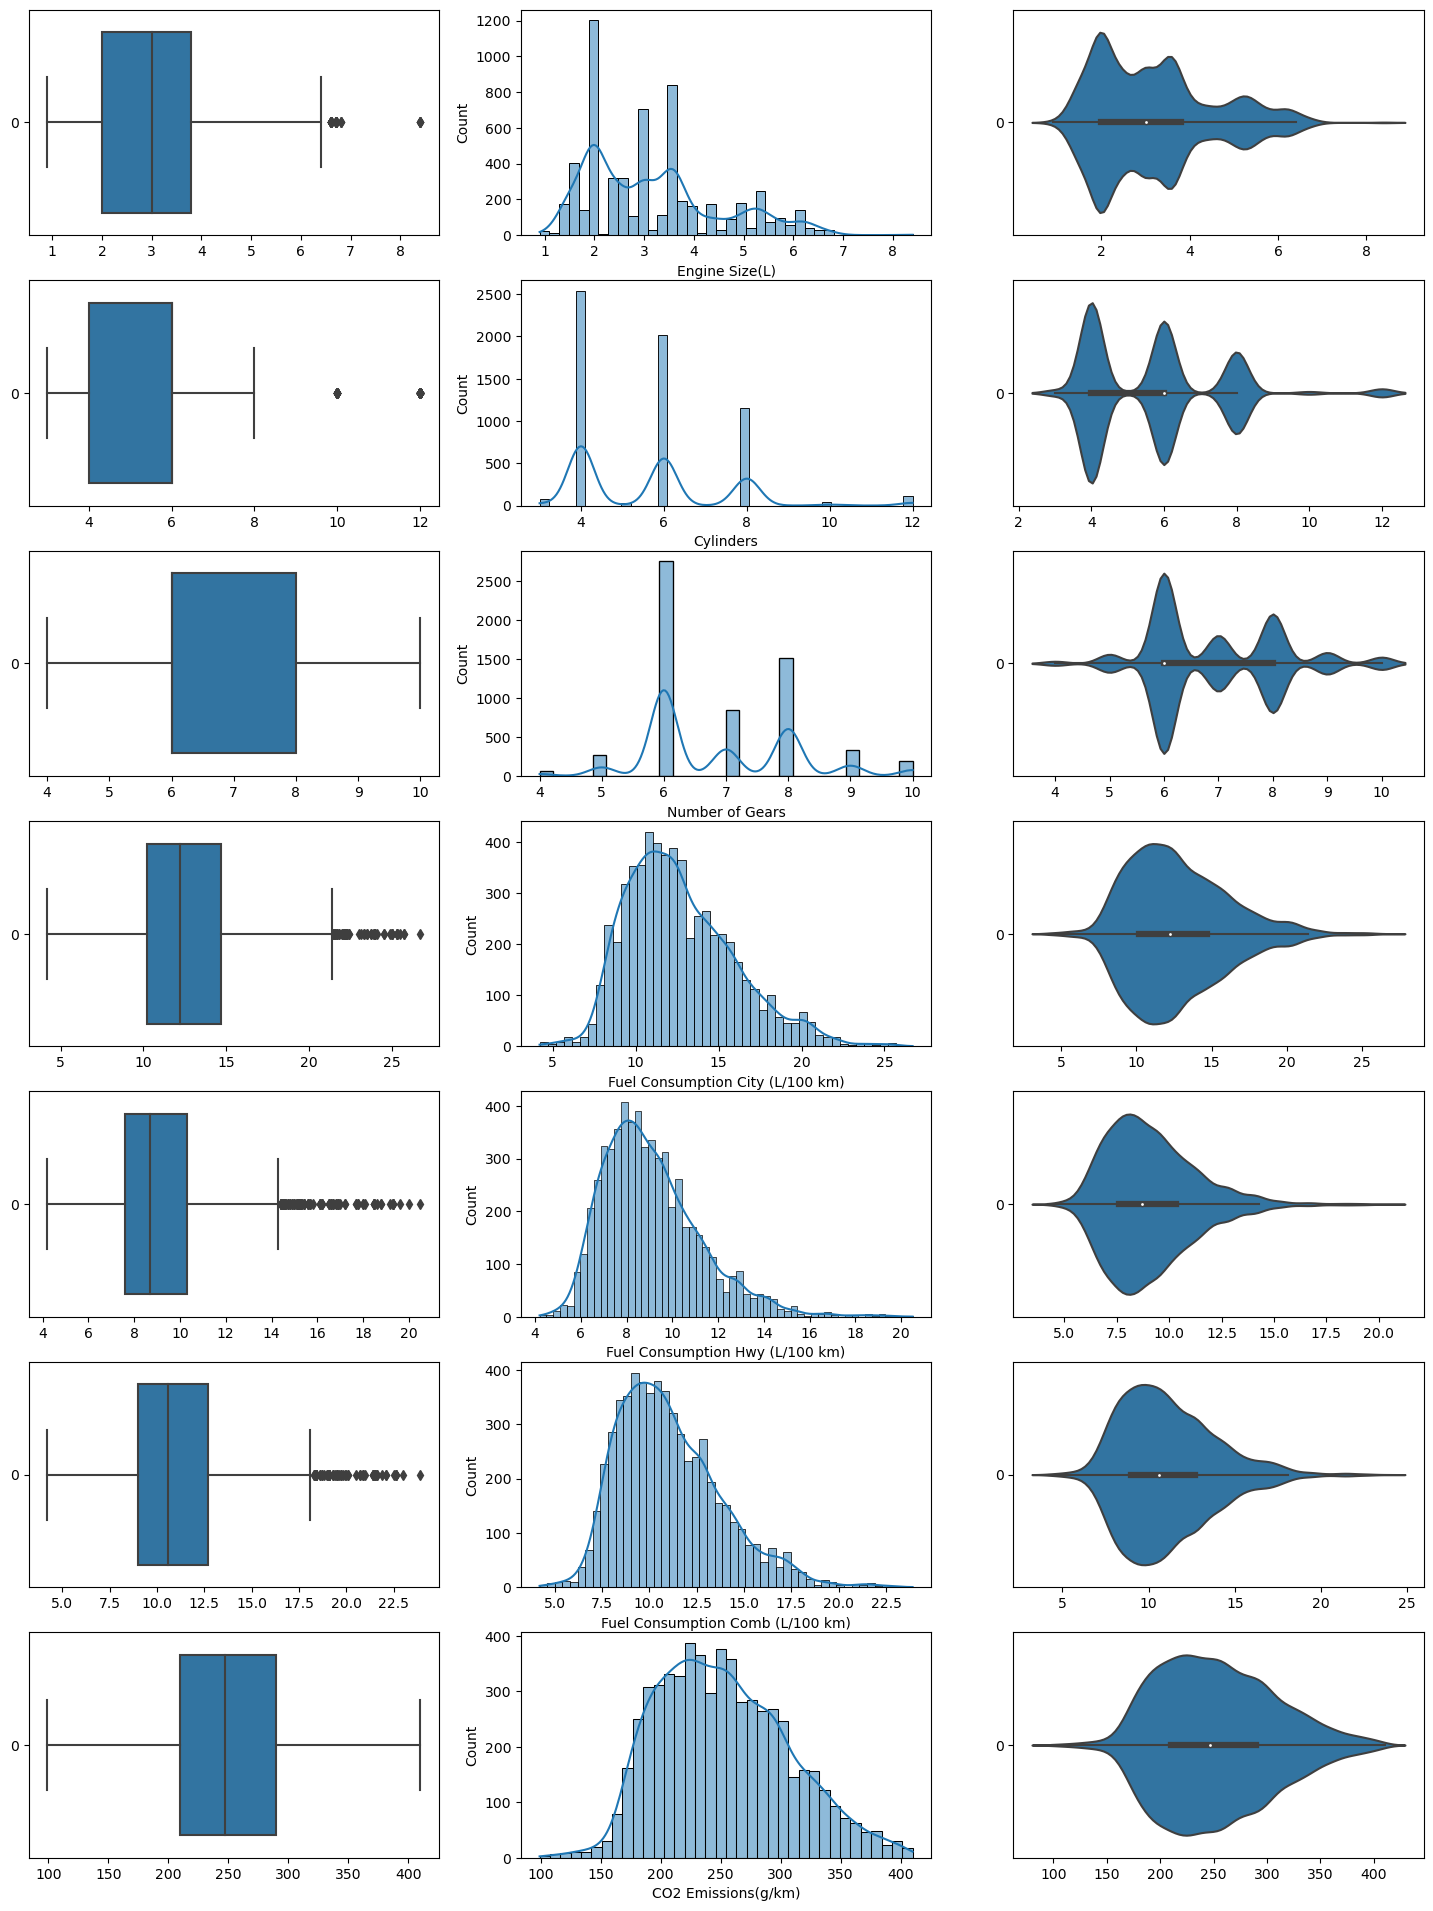

In [15]:
# Display the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(18, 24))

count = 0
for var in numDf:
    sb.boxplot(data = numDf[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDf[var], ax = axes[count,1],kde=True)
    sb.violinplot(data = numDf[var], orient = "h", ax = axes[count,2])
    count += 1

In [16]:
skewness = numDf.skew()
print("Skewness for each variable:")
print(skewness)

Skewness for each variable:
Engine Size(L)                      0.782916
Cylinders                           1.016619
Number of Gears                     0.556391
Fuel Consumption City (L/100 km)    0.735812
Fuel Consumption Hwy (L/100 km)     1.022837
Fuel Consumption Comb (L/100 km)    0.824832
CO2 Emissions(g/km)                 0.400736
dtype: float64


As seen from these graphs, the numerical variables are skewed positive.

From the graphs of Cylinders, it can be observed that most vehicles generally have either 4, 6 or 8 cylinders.

From the graphs of Number of Gears, it can be observed that most vehicles have 6 gears.

Now, we look at the correlation between our numerical variables.

In [17]:
# Calculate the correlation matrix
numDf.corr()

,Engine Size(L),Cylinders,Number of Gears,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928544,0.180167,0.829584,0.751648,0.812193,0.853699
Cylinders,0.928544,1.000000,0.234465,0.798466,0.705353,0.775275,0.835832
Number of Gears,0.180167,0.234465,1.000000,0.111916,0.067563,0.097625,0.174882
Fuel Consumption City (L/100 km),0.829584,0.798466,0.111916,1.000000,0.946952,0.993409,0.904279
Fuel Consumption Hwy (L/100 km),0.751648,0.705353,0.067563,0.946952,1.000000,0.977216,0.868849
Fuel Consumption Comb (L/100 km),0.812193,0.775275,0.097625,0.993409,0.977216,1.000000,0.902898
CO2 Emissions(g/km),0.853699,0.835832,0.174882,0.904279,0.868849,0.902898,1.000000


<Axes: >

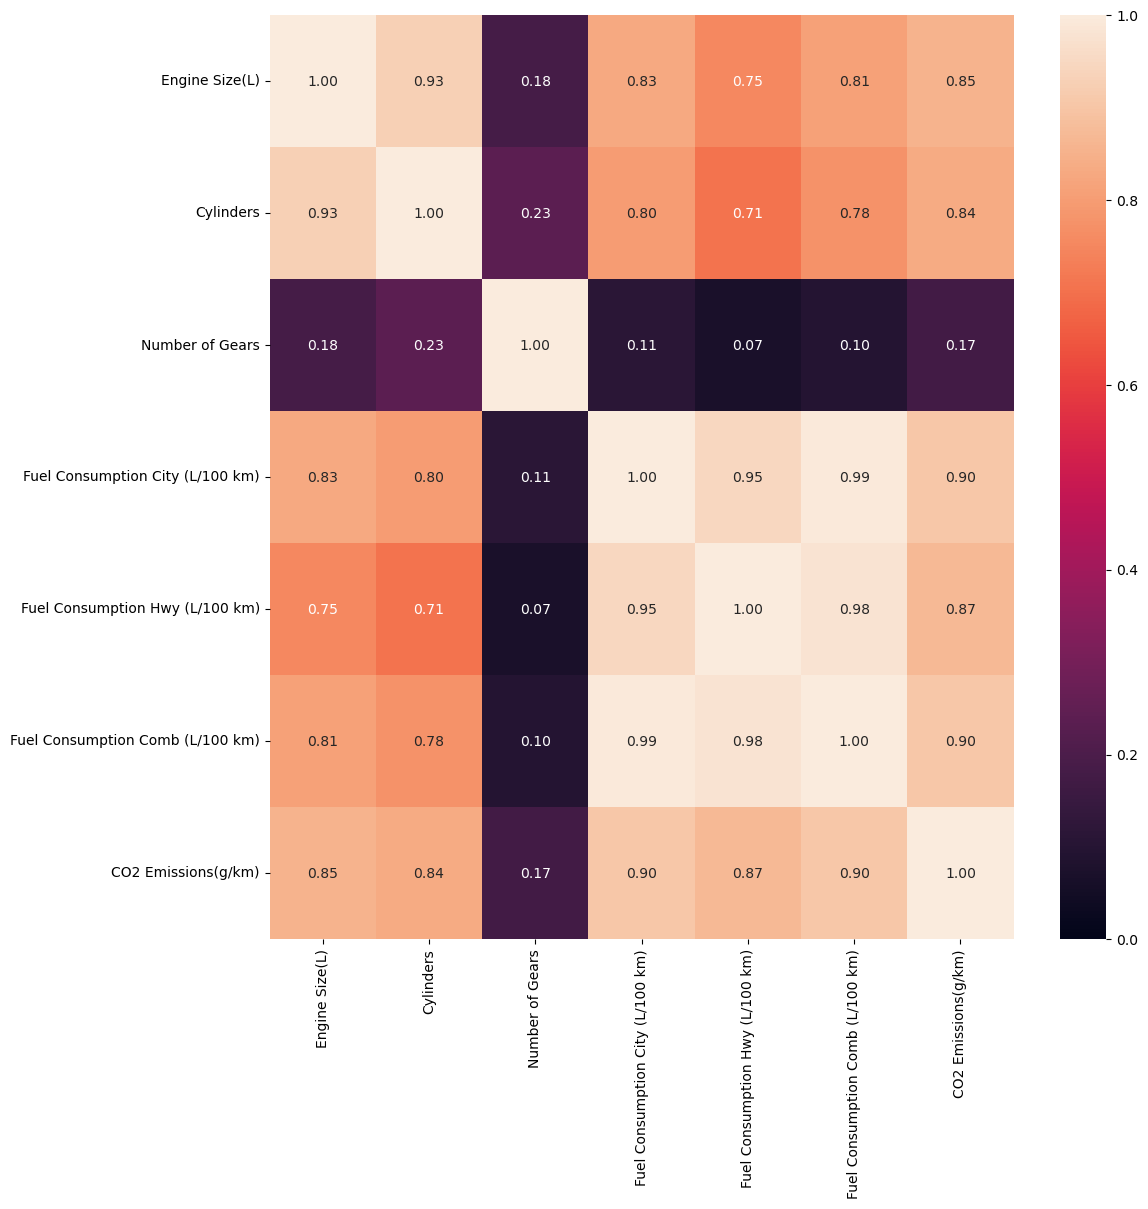

In [18]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDf.corr(), vmin = 0, vmax = 1, annot = True, fmt = ".2f")

From the heatmaps and correlation matrices, there is a strong positive correlation between CO2 Emissions and the other numerical variables except Number of Gears. This suggests a relatively strong linear relationship between CO2 Emissions and other numerical variables except Number of Gears as depicted in the pairplot below. There is a weak positive correlation between CO2 Emissions and Number of Gears. This suggests that there is a weak linear relationship between CO2 Emissions and Number of Gears.

In addition, there is a strong positive correlation between Engine Size and Fuel Consumption City, Fuel Consumption Hwy and Fuel Consumption Comb.

Also, there is a strong positive correlation between Cylinders and Fuel Consumption City, Fuel Consumption Hwy and Fuel Consumption Comb.

/Users/chester/Documents/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


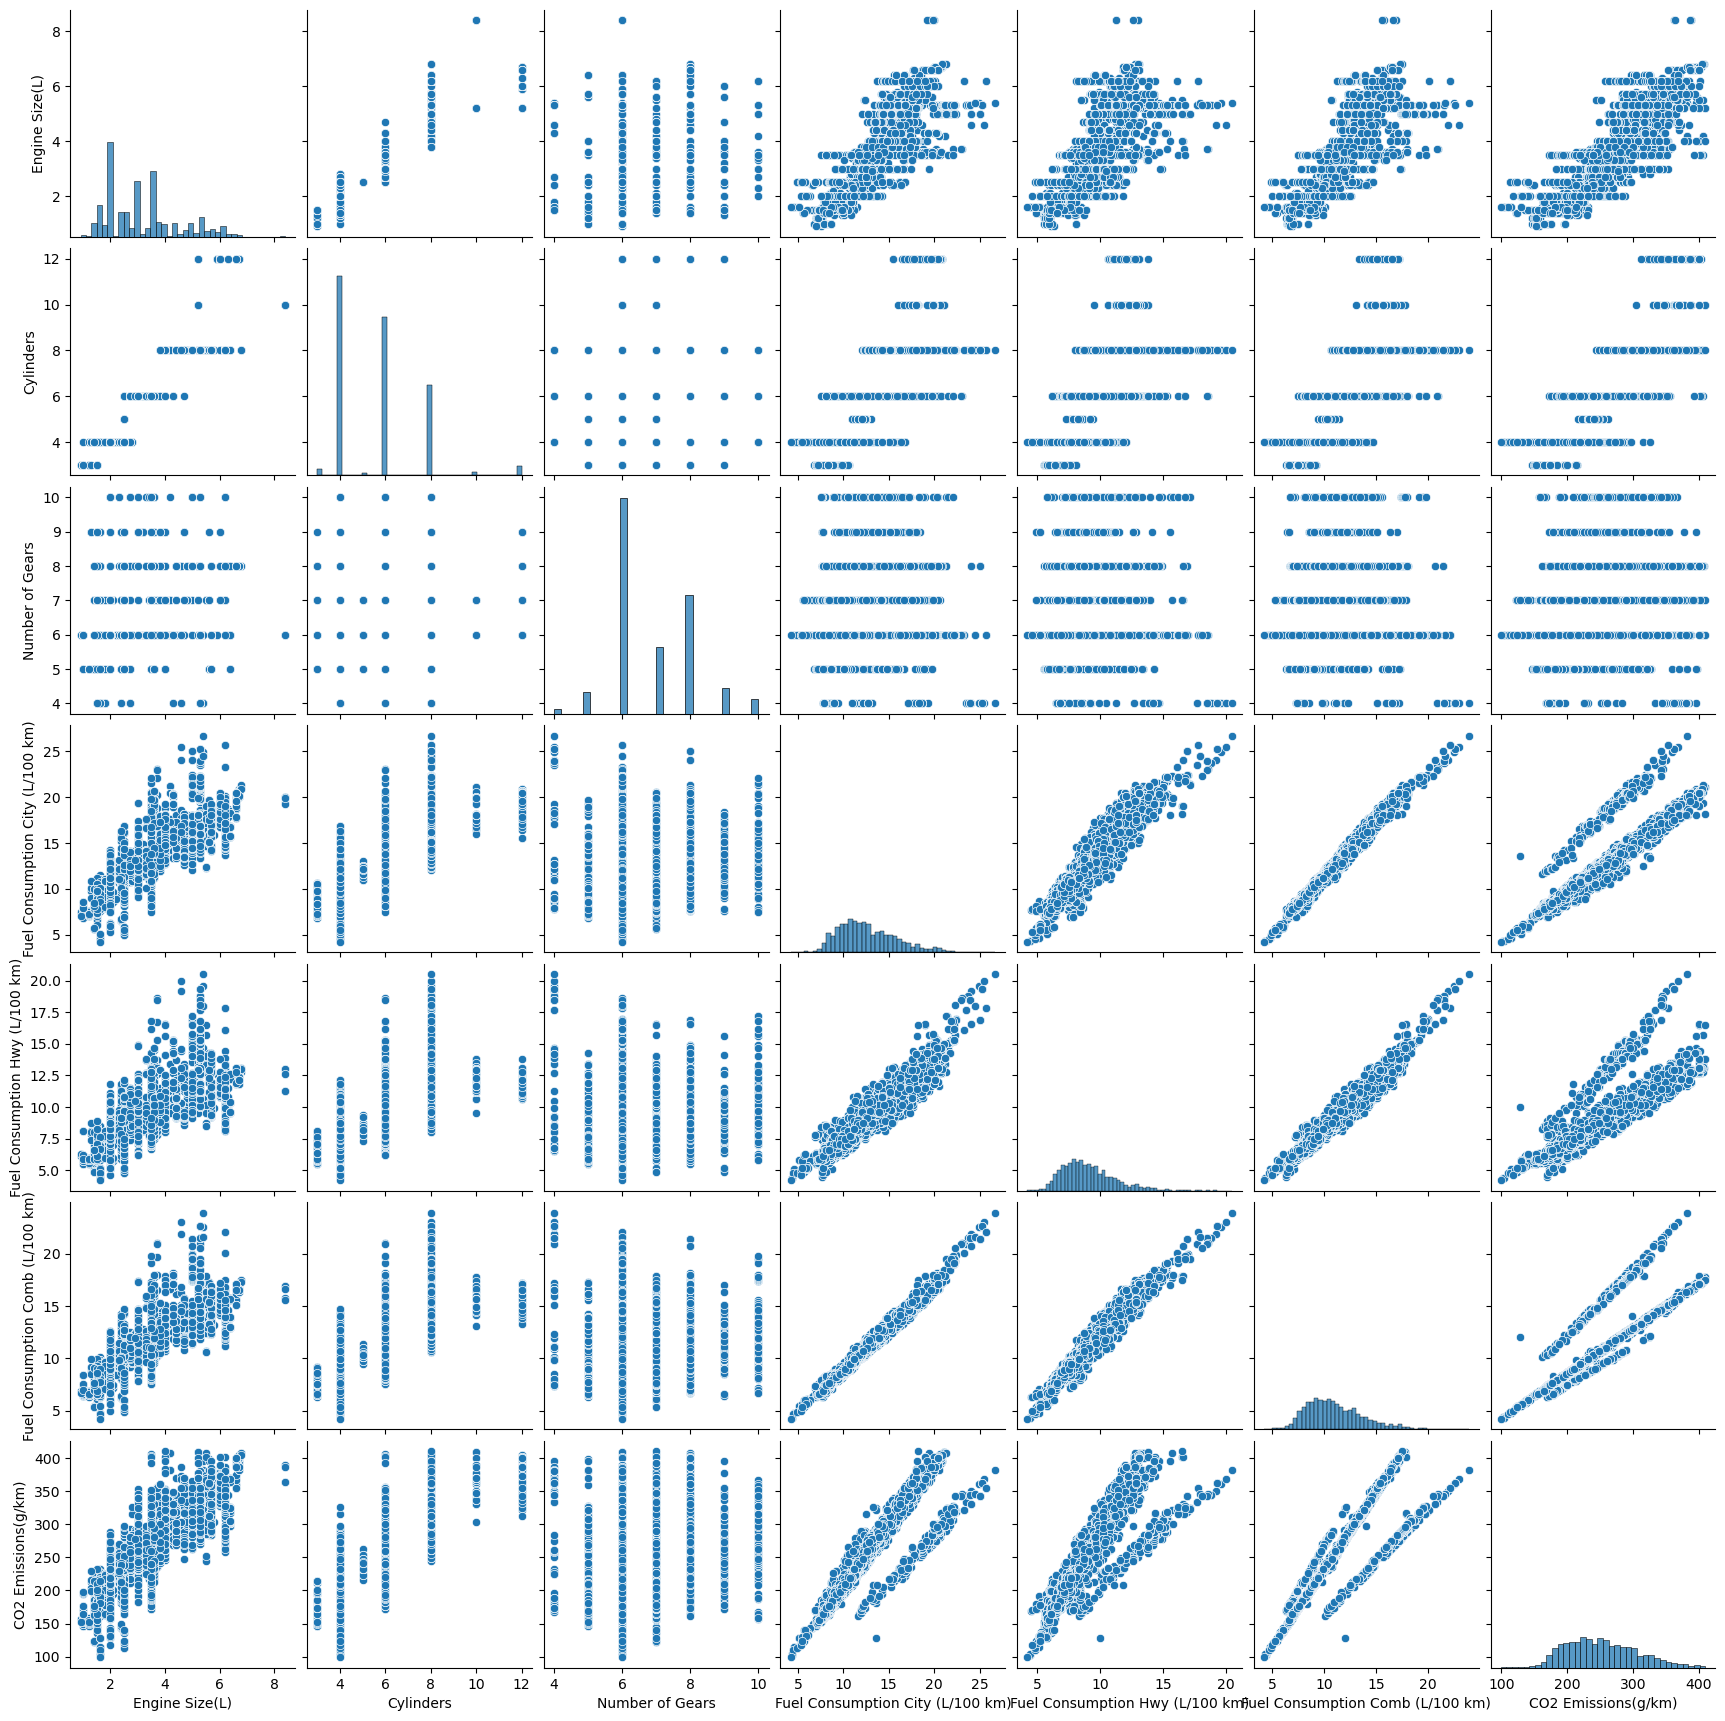

In [19]:
# Draw pairs of variables against one another
sb.pairplot(data = numDf)

We can observe that the plot points in the Joint Plot between Engine Size is the more scattered as compared to the Joint Plots between Fuel Consumption and CO2 Emission but it still forms a relative narrow oval shape. 

We can also observe that plot points in the Joint Plot between Cylinders and CO2 Emissions is more scattered as compared to the Joint Plots between Fuel Consumption and CO2 Emission. There is still a general increasing trend of CO2 emission when number of Cylinders increases.

We can also observe that plot points in the Joint Plot between Number of Gears and CO2 Emissions is very scattered. There is no obvious general trend. This may suggest that the Number of Gears is not a significant factor in determining CO2 Emissions.

Comparing between the Fuel Consumption calulated in the 3 different ways against CO2 Emission, it can be observed that the plot points in the Joint Plot between Fuel Consumption Comb and CO2 Emissions is the least scattered and forms distinct lines. The distinct lines could indicate that there are distinct groups or patterns in the data. The data may be organised by different Fuel Type, Transmission Type, Vehicle Class, etc. Each type may have different relationships between Fuel Consumption and CO2 Emissions, leading to separate clusters in the joint plot. This will be further investigated as we look at the categorical variables.

## Categorical Variables
Let us look at the categorical data.
> Make    
> Model  
> Vehicle Class       
> Transmission  
> Fuel Type      

Our project examines the specifications of a vehicle. The make and model which denotes the company of the vehicle and car model respectively are not vehicle specifications, but serve as identifiers for vehicles. Instead, we will focus on the other categorical variables: Vehicle Class, Transmission, and Fuel Type as these features truly define the distinct specifications of a vehicle.

In [20]:
# Extract the categorical variables
catDf = df_filtered2[['Vehicle Class', 'Transmission', 'Fuel Type']]
catDf.head()

,Vehicle Class,Transmission,Fuel Type
0,COMPACT,AS,Z
1,COMPACT,M,Z
2,COMPACT,AV,Z
3,SUV - SMALL,AS,Z
4,SUV - SMALL,AS,Z


In [21]:
# Calculate the number of unique values for each categorical variable
for var in catDf.columns:
    unique_values = catDf[var].unique()
    num_unique_values = len(unique_values)
    print(f"Number of unique values in {var}: {num_unique_values}")

Number of unique values in Vehicle Class: 16
Number of unique values in Transmission: 5
Number of unique values in Fuel Type: 5


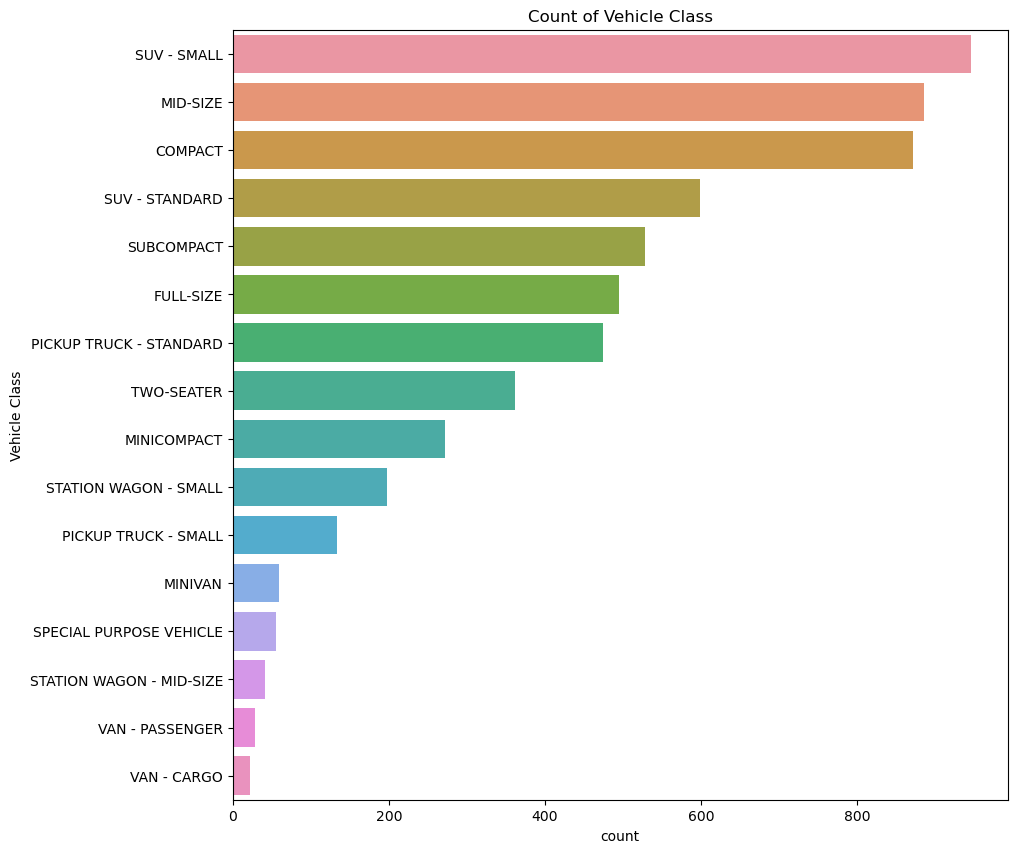

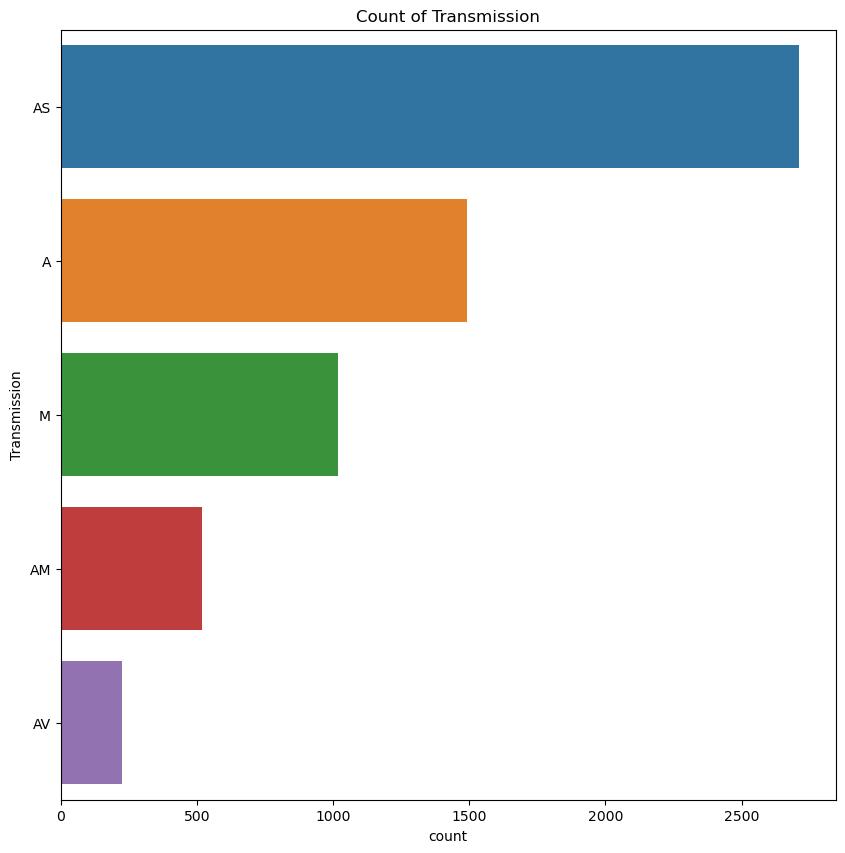

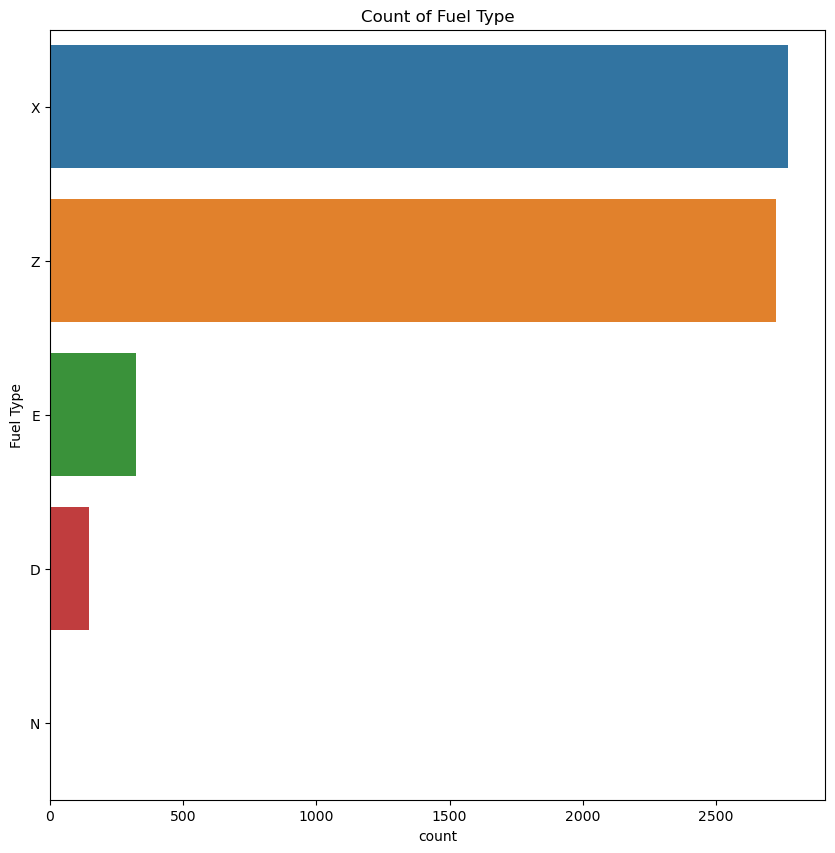

In [22]:
# Display the Count Plots 
for var in catDf.columns:
    plt.figure(figsize=(10, 10))
    sb.countplot(y=var, data=df_filtered2, order=df_filtered2[var].value_counts().index)
    plt.title(f'Count of {var}')
    plt.show()

The most frequent vehicle class is SUV-Small.  
The number of vehicles of Automatic with select shift(AV) tramission type is the greatest.  
Majority of the vehicles use regular gasoline(X) and premium gasoline(Z).

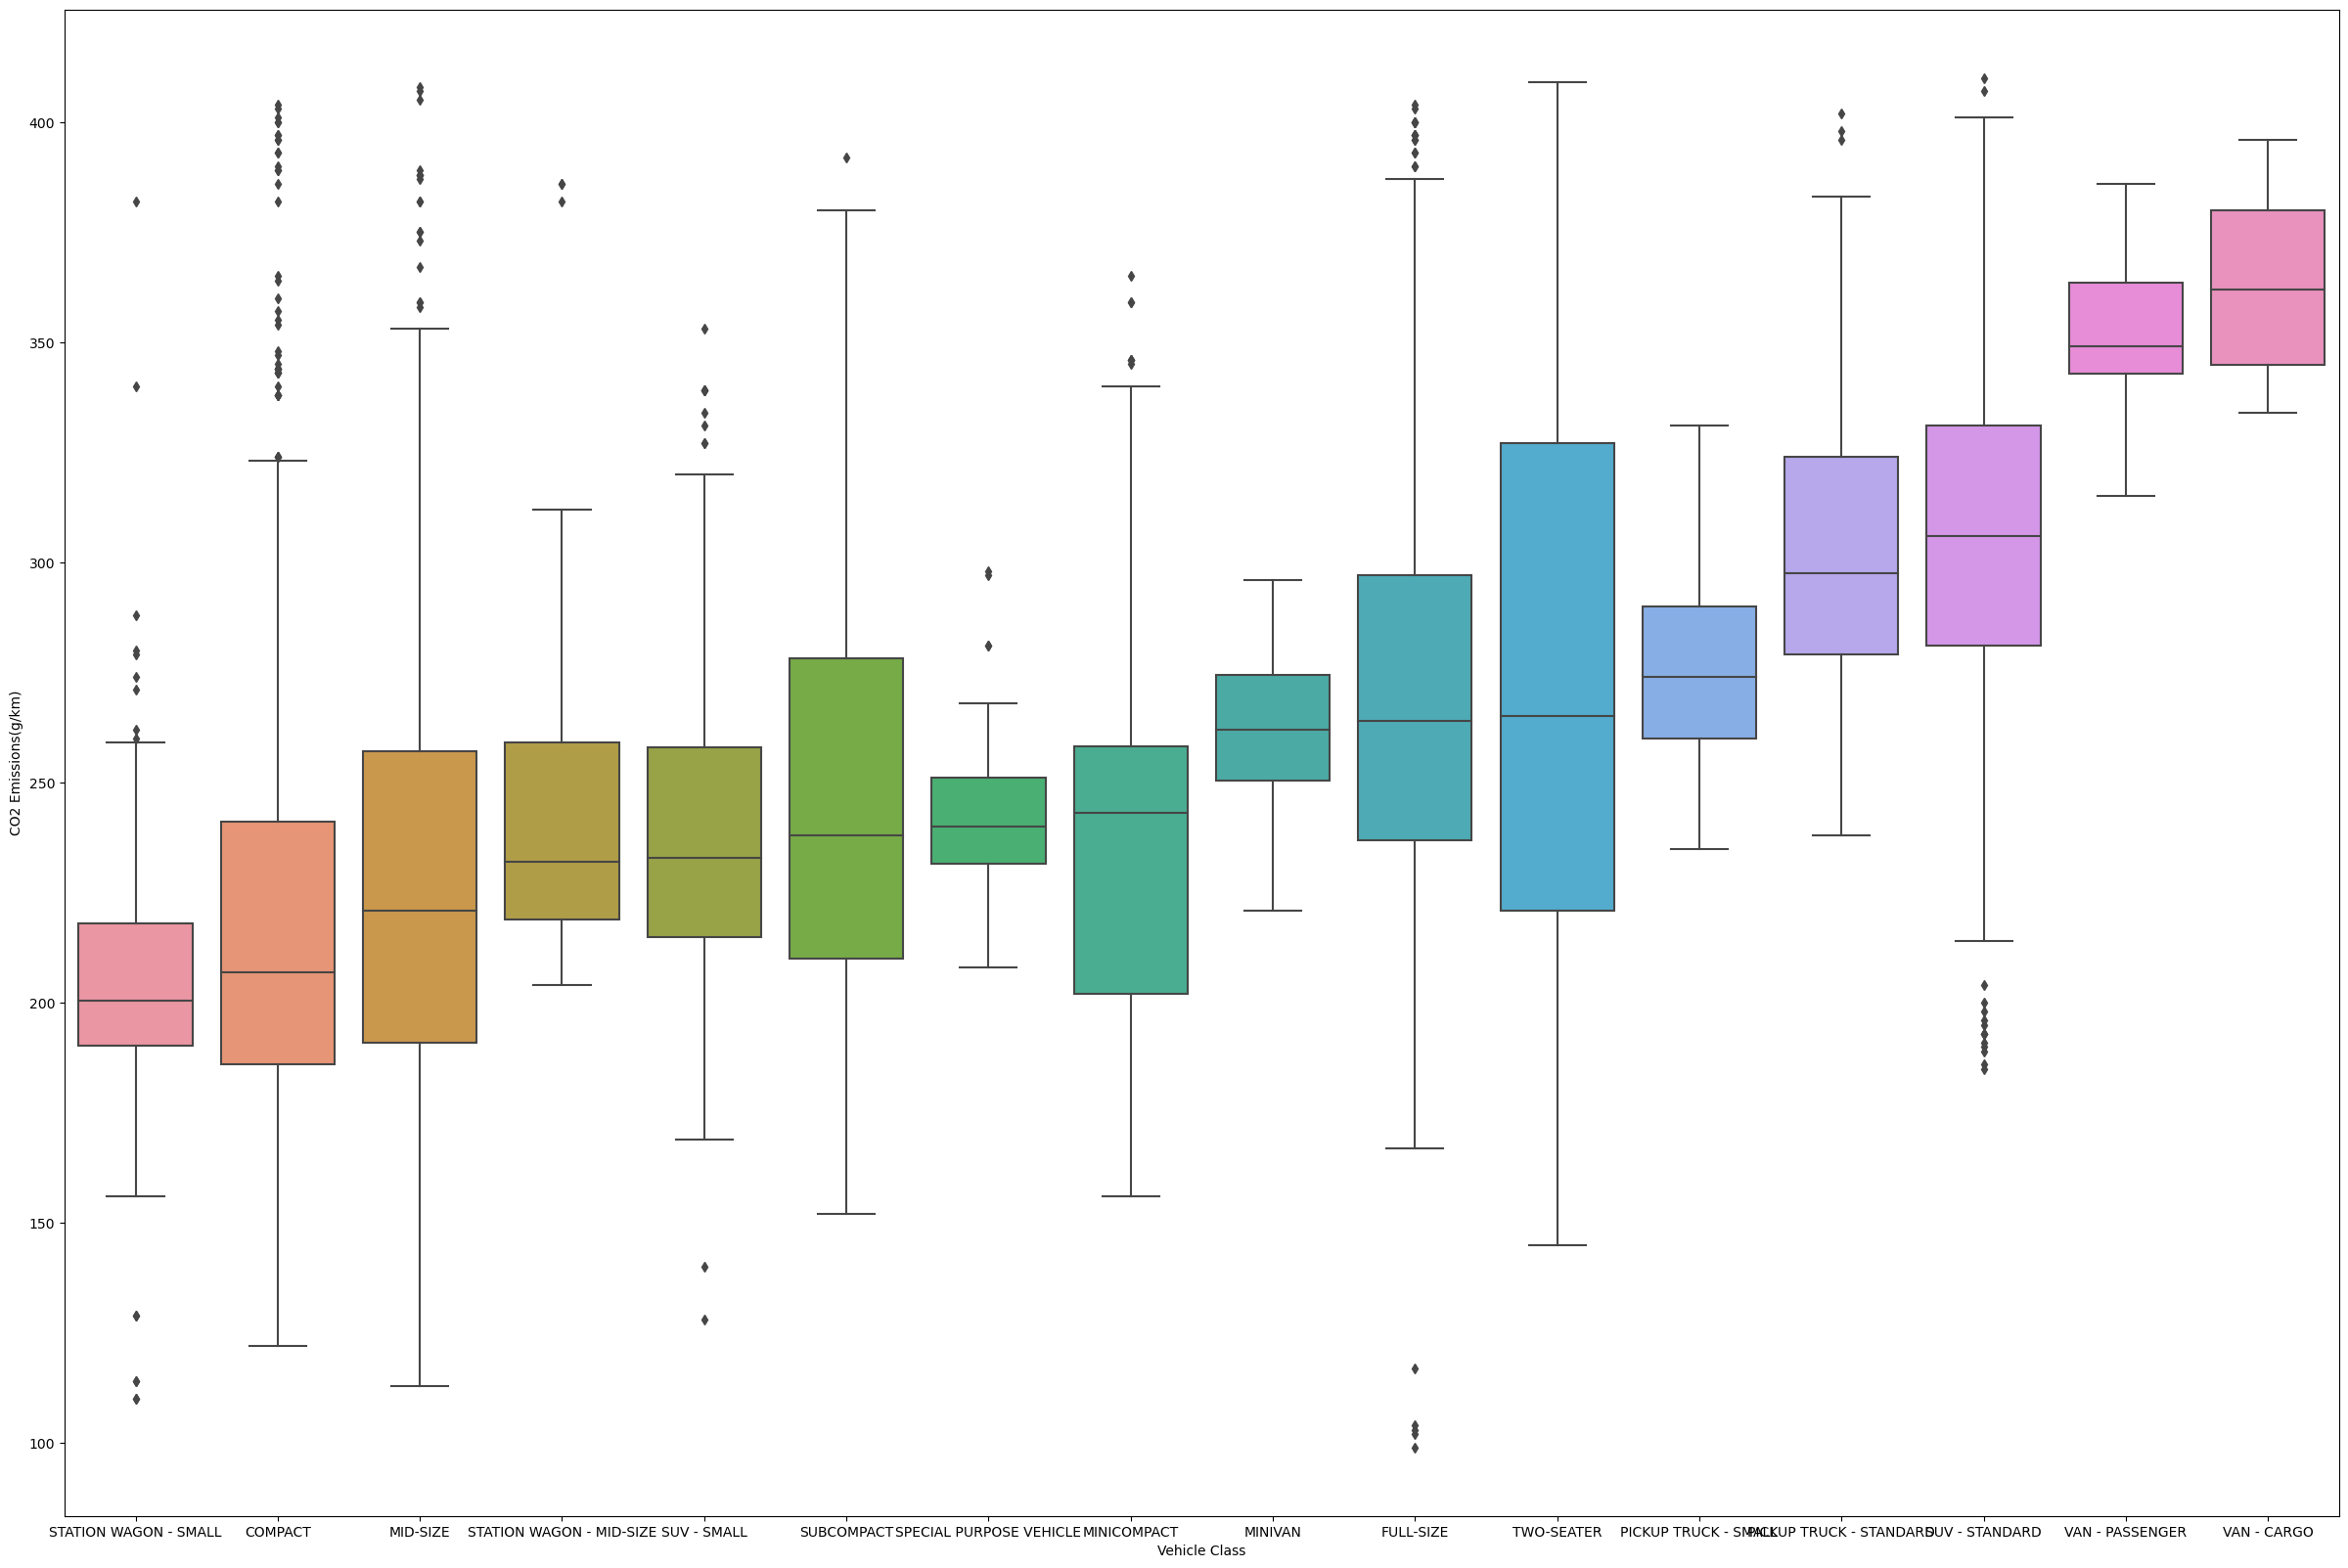

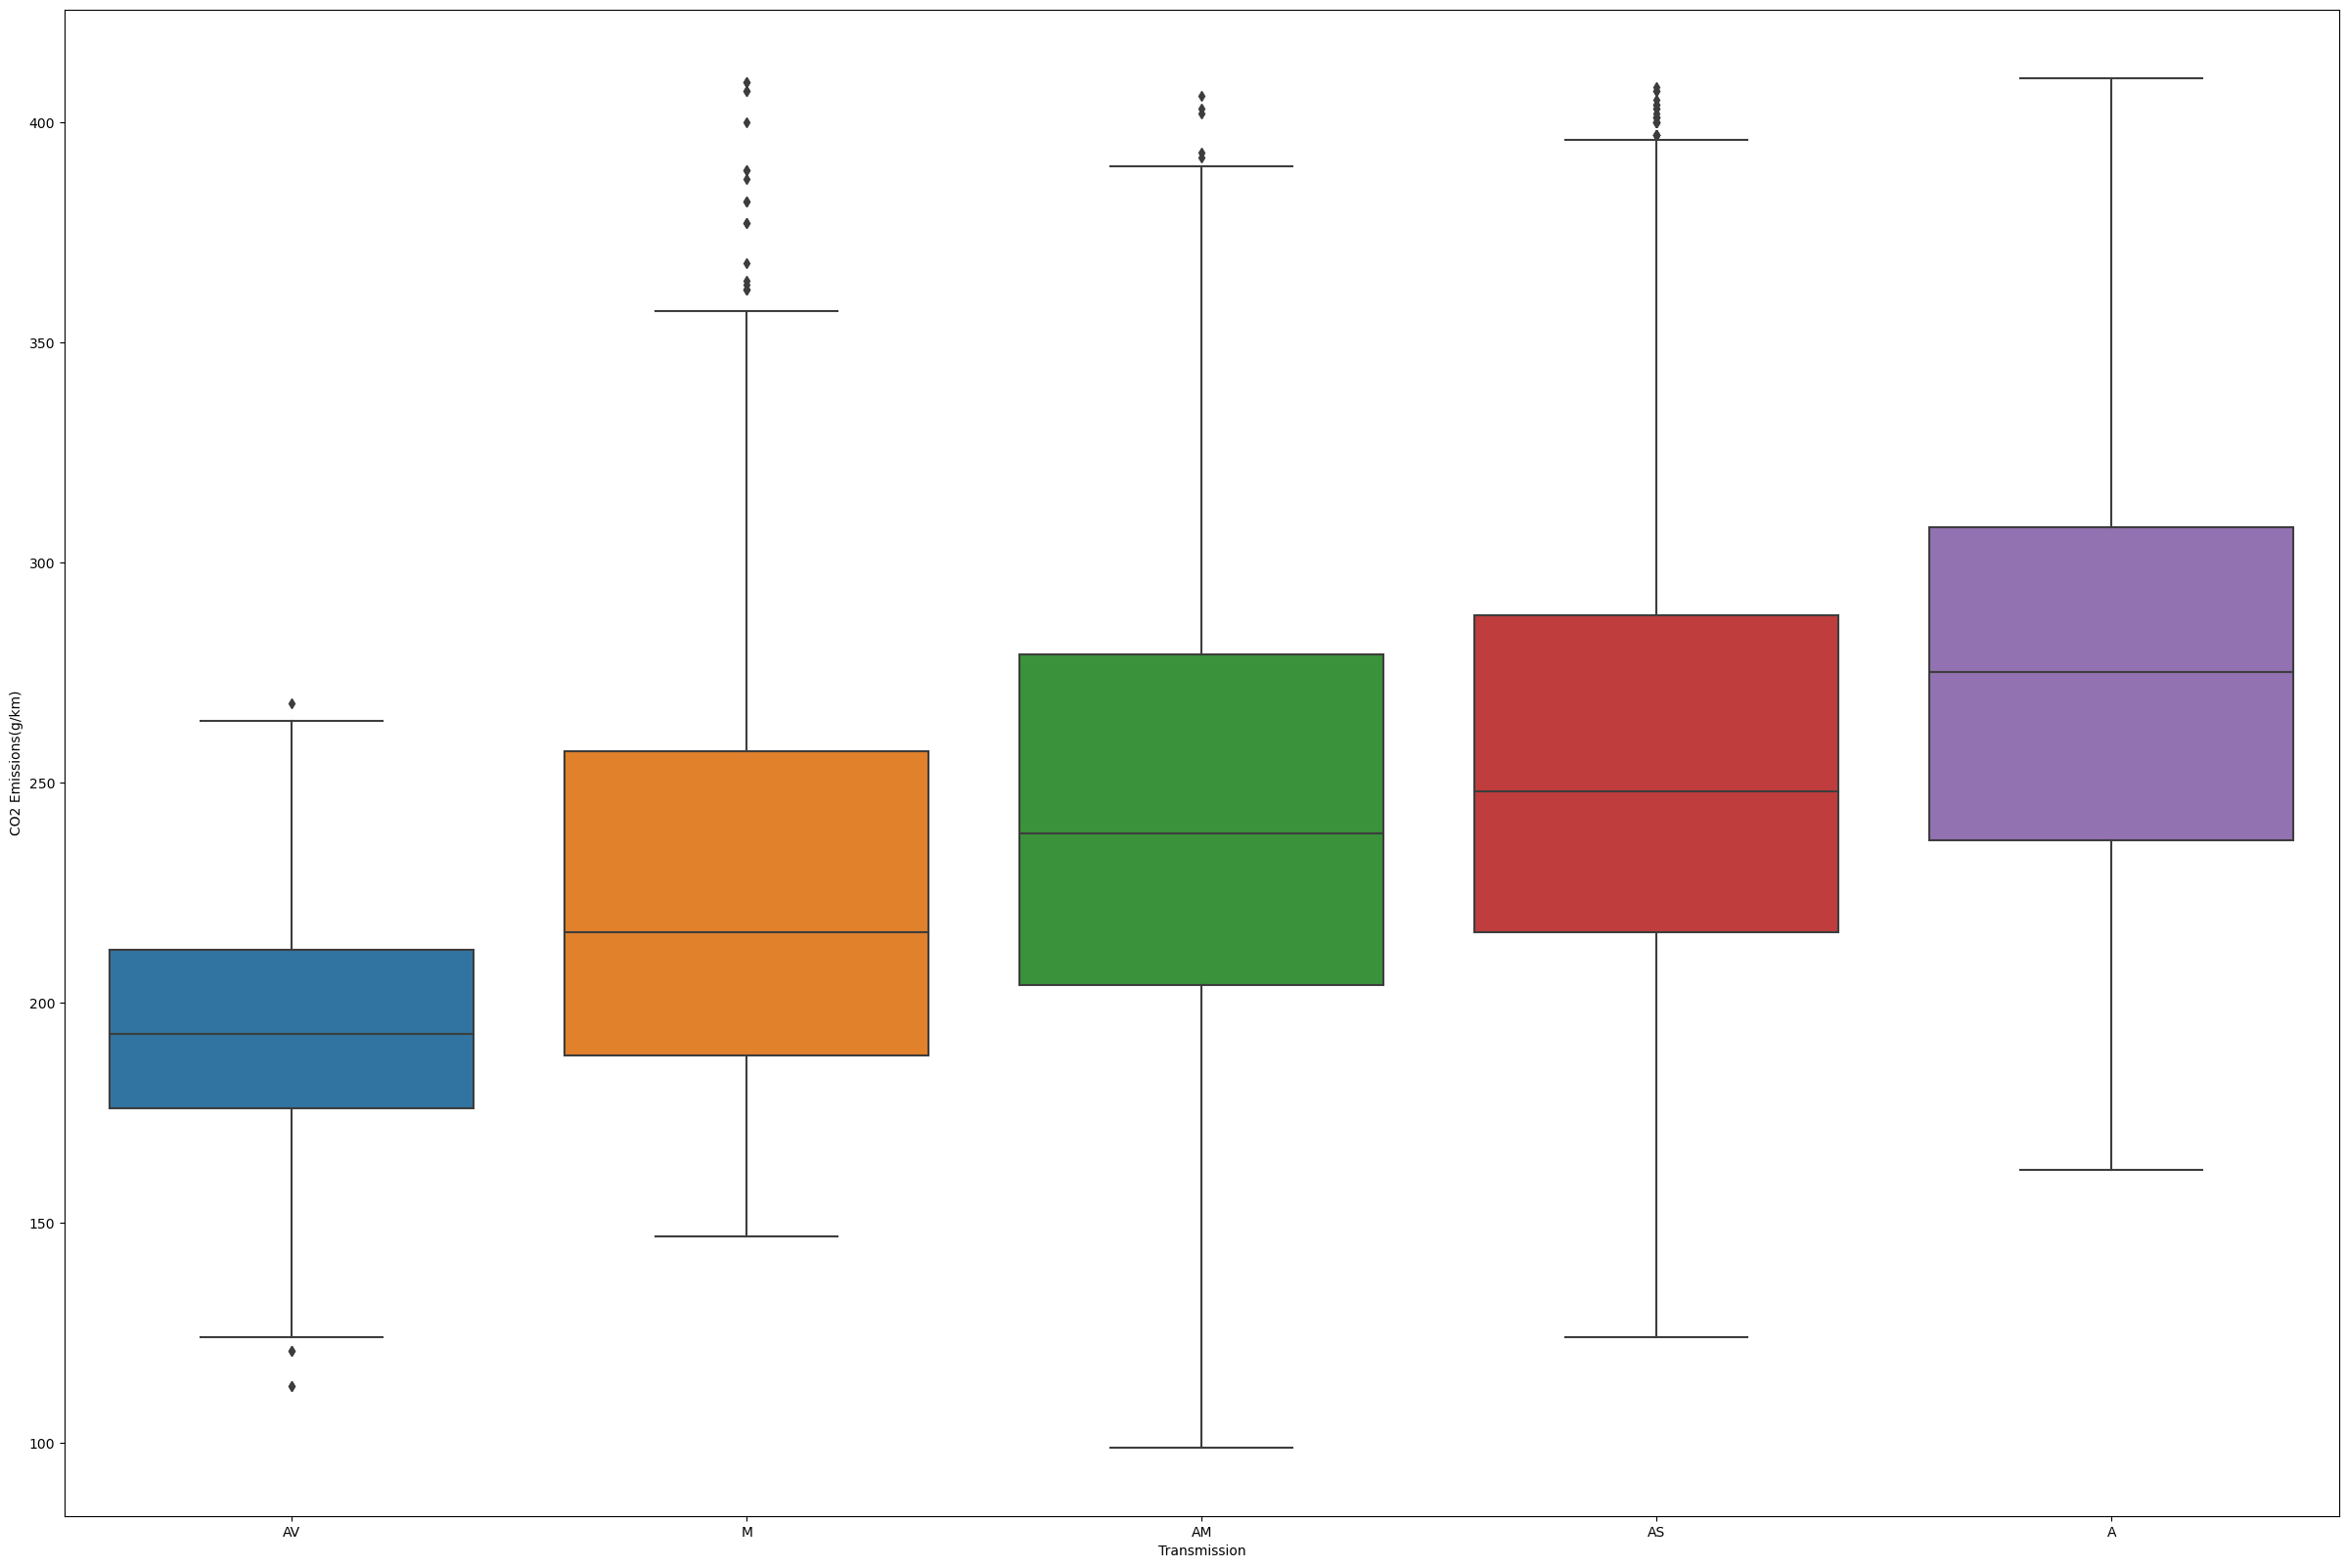

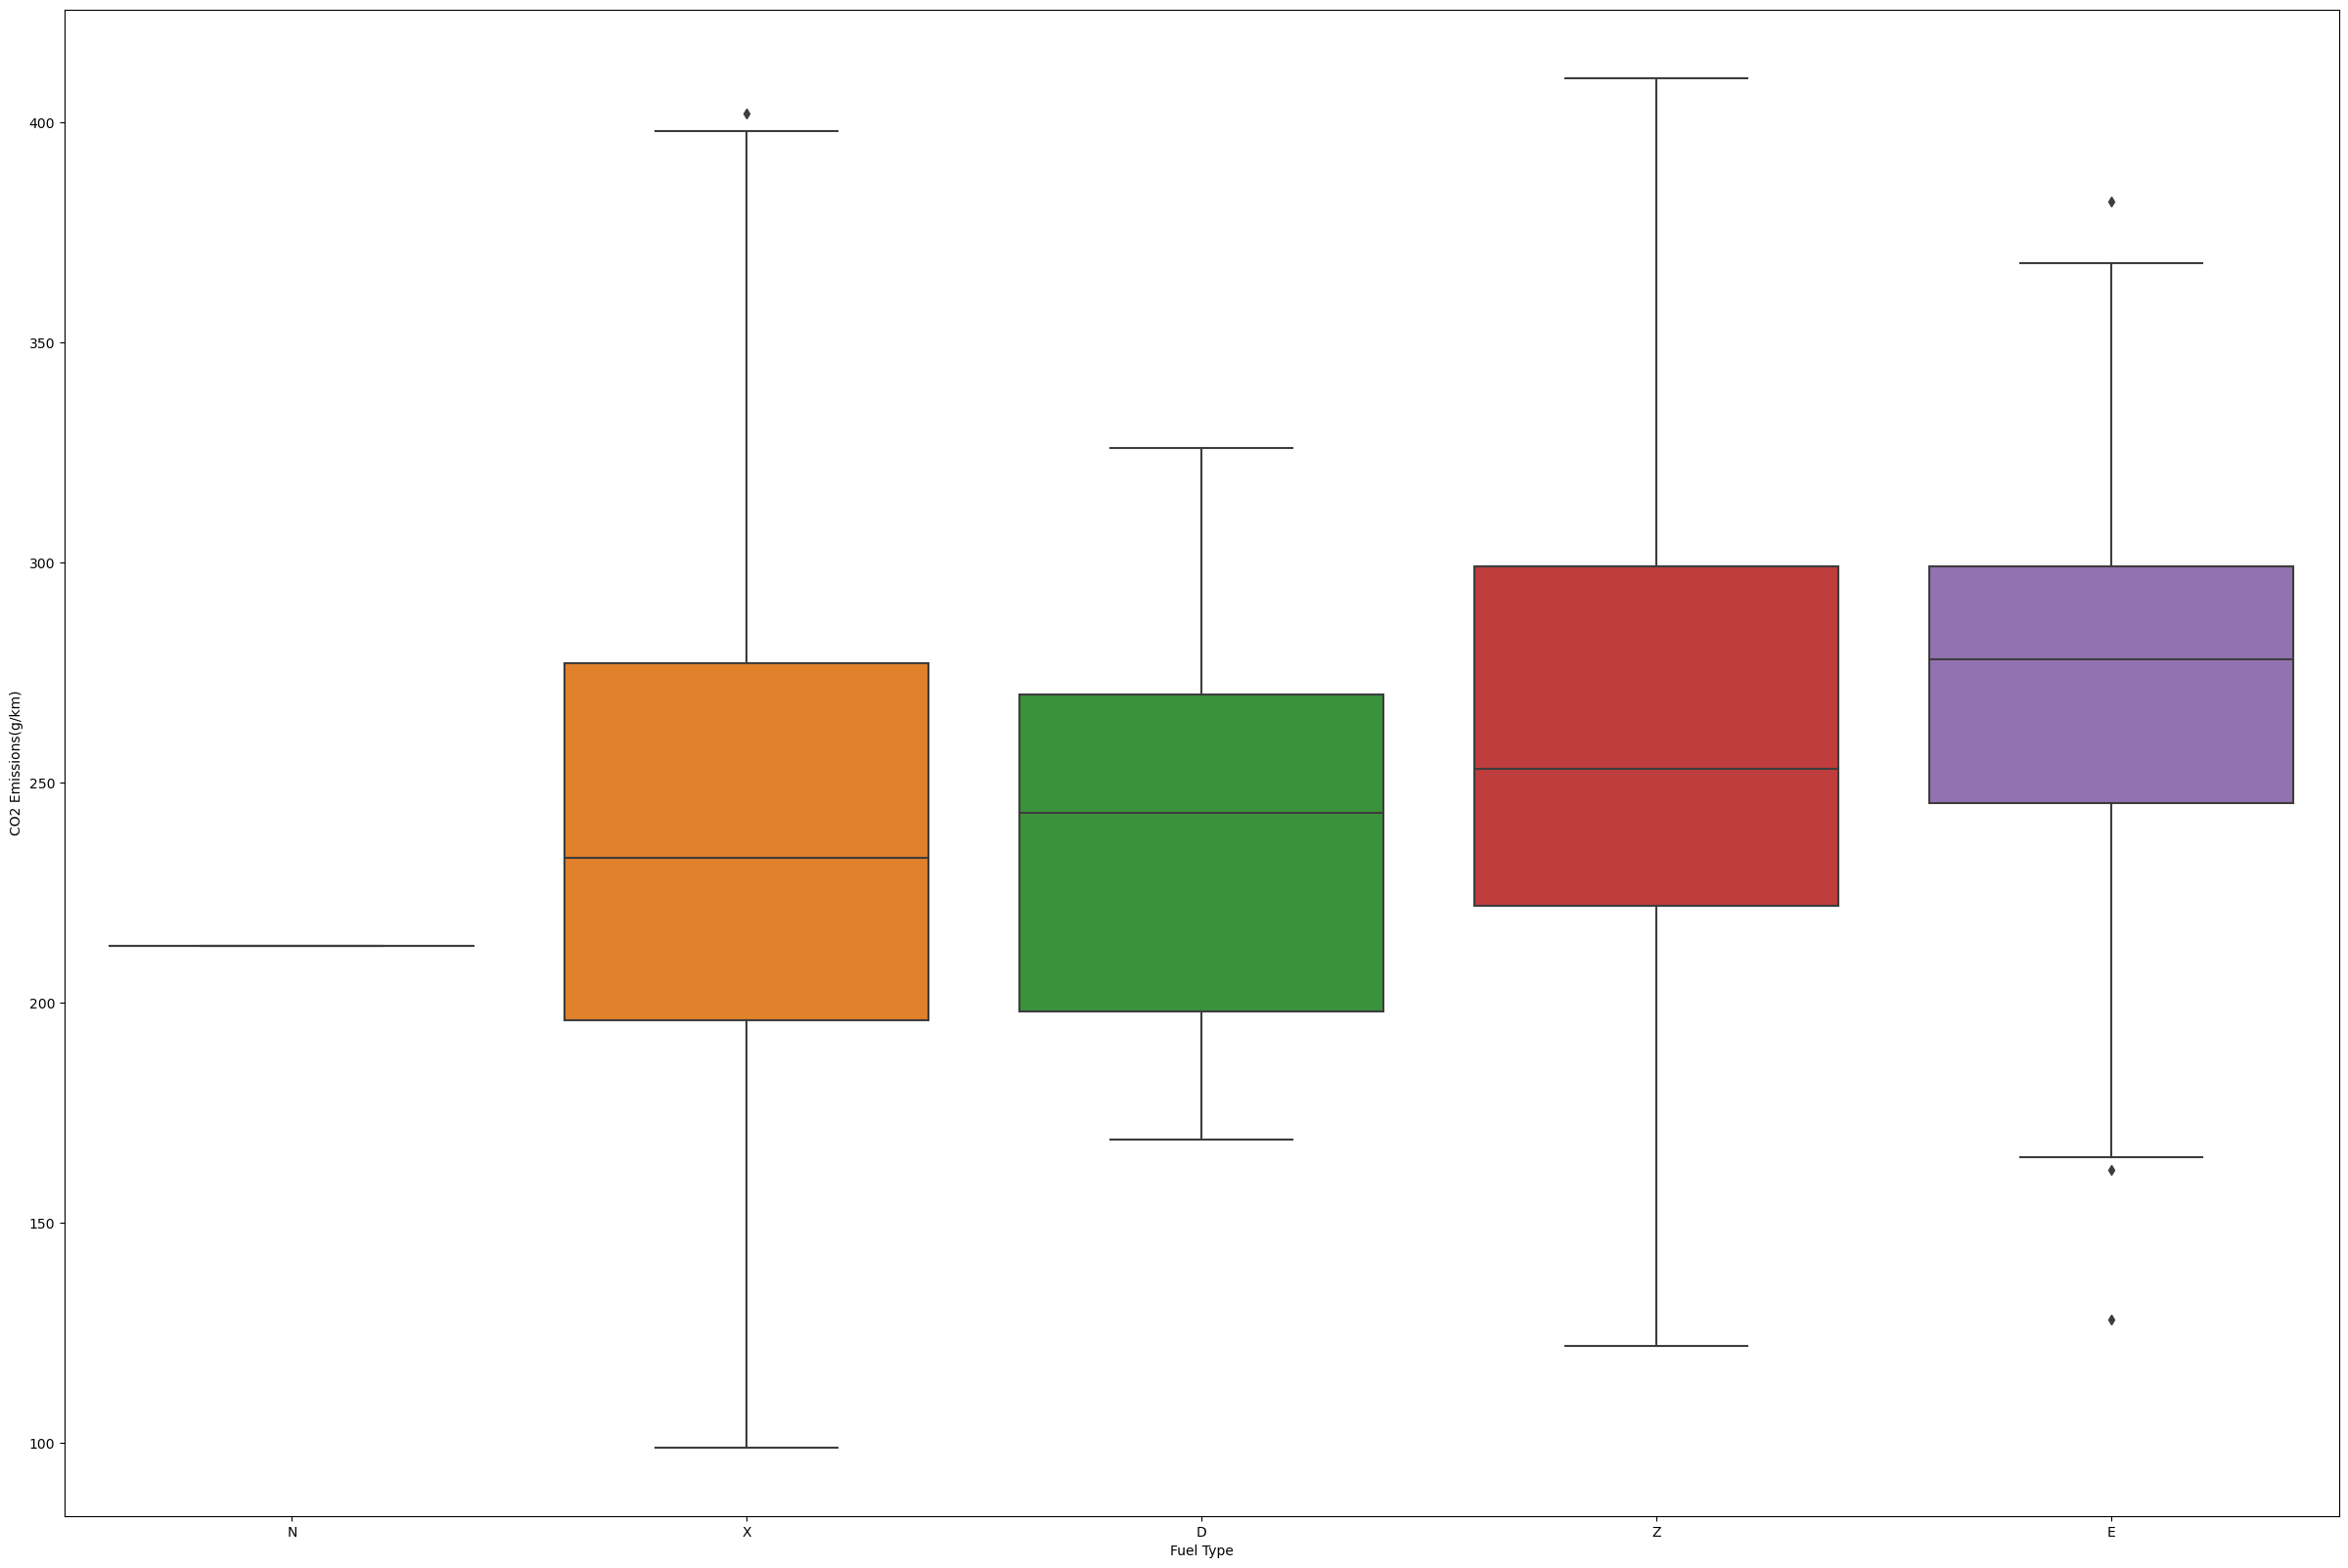

In [23]:
# Display the boxplots
for var in catDf:
    catDf_var = pd.DataFrame(df_filtered2[[var, 'CO2 Emissions(g/km)']])
    f = plt.figure(figsize=(30, 20))
    order = catDf_var.groupby(var)['CO2 Emissions(g/km)'].median().sort_values().index
    sb.boxplot(x=var, y='CO2 Emissions(g/km)', data=catDf_var, order = order)

From the boxplots, it can be observed that there is a general increase in the median of CO2 emissions across the categories of each categorical variable. 

However, there are quite a number of overlaps of boxplots seen for all the categorical variables.

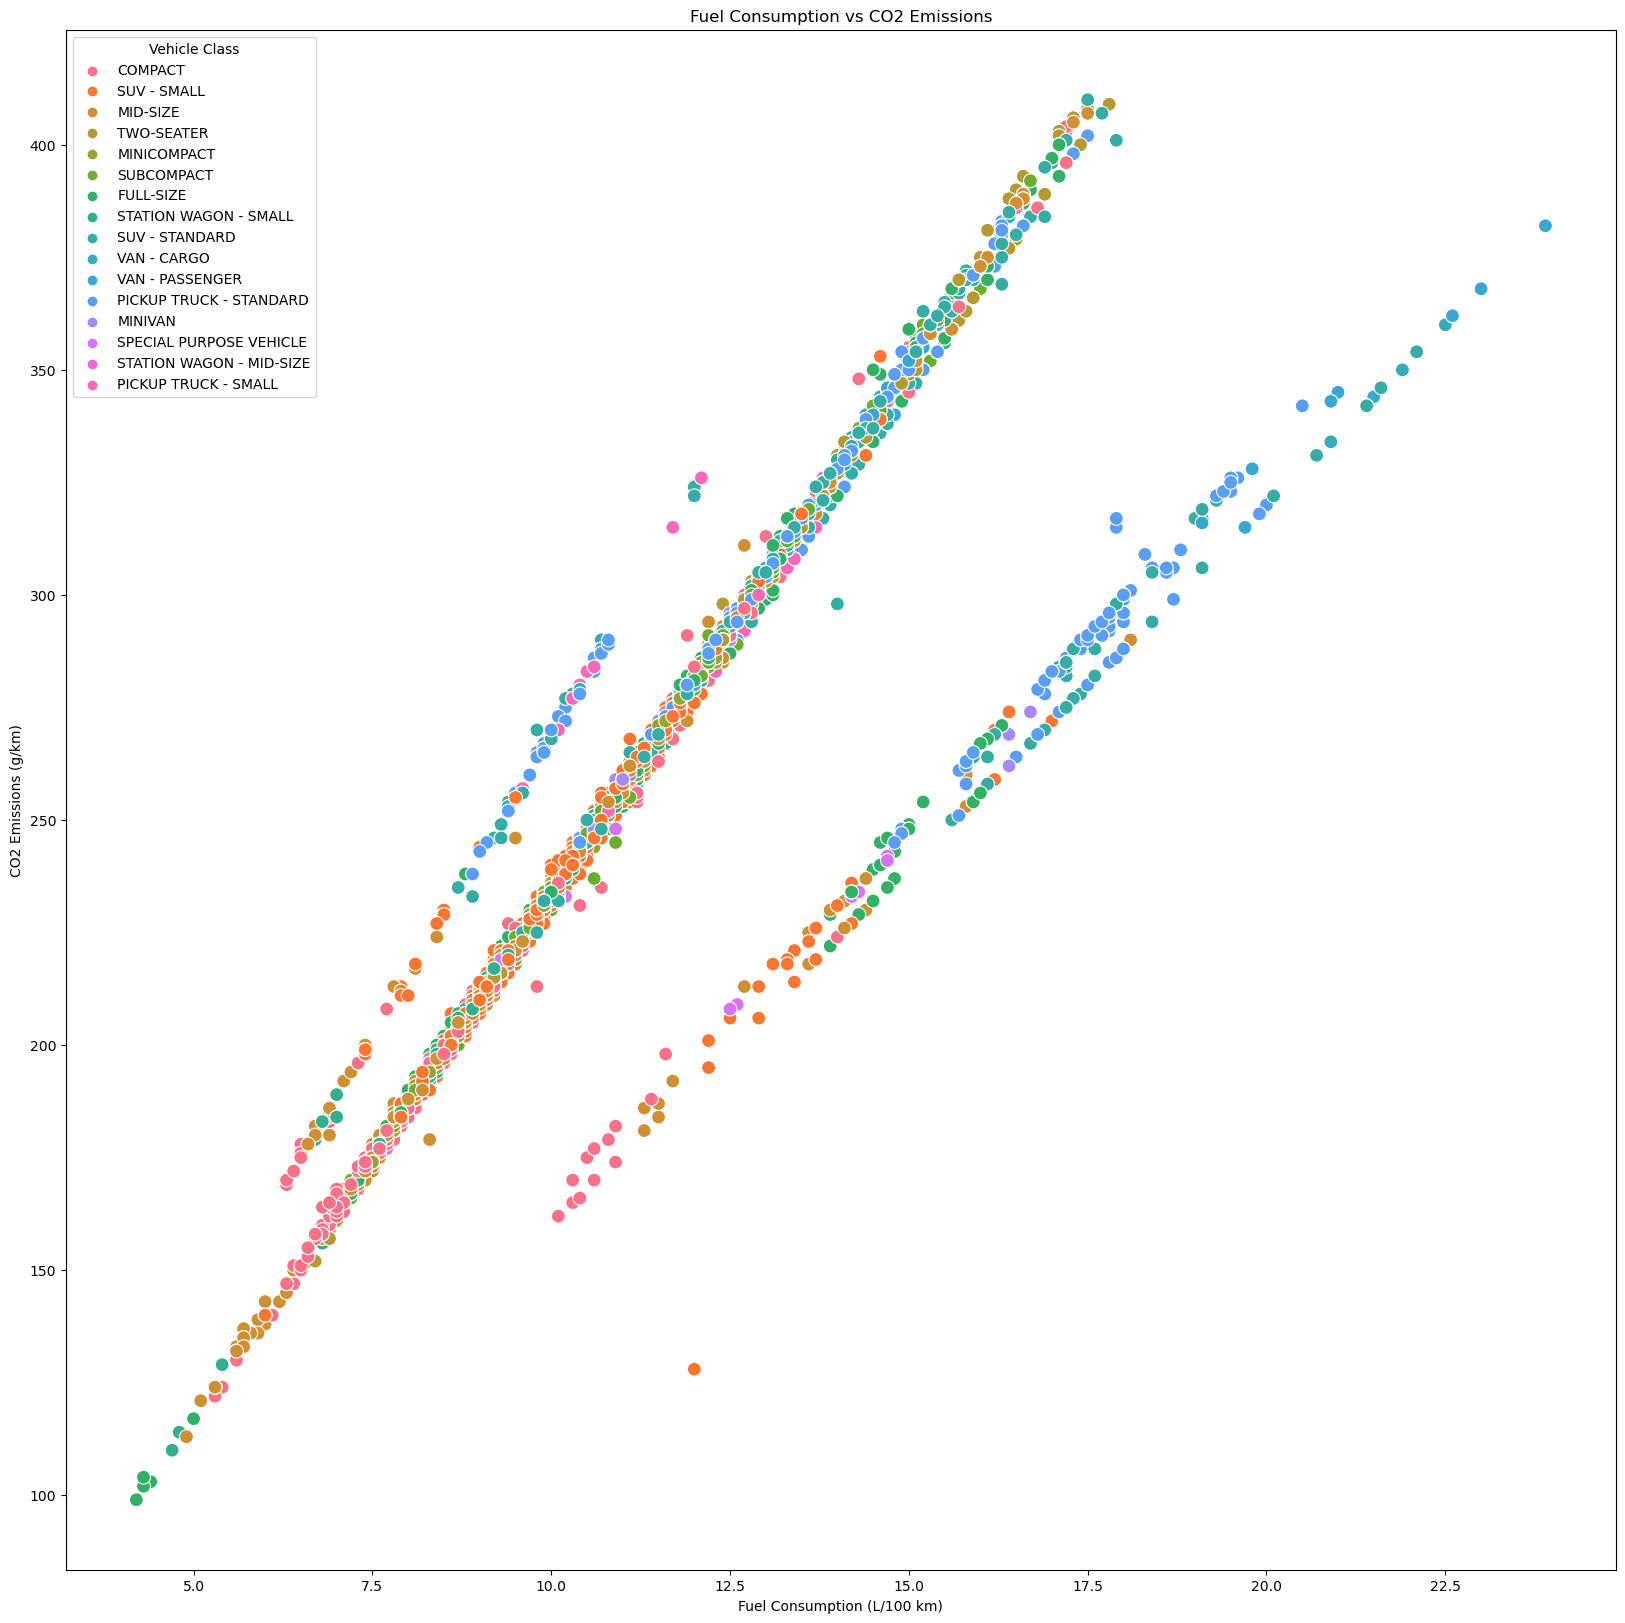

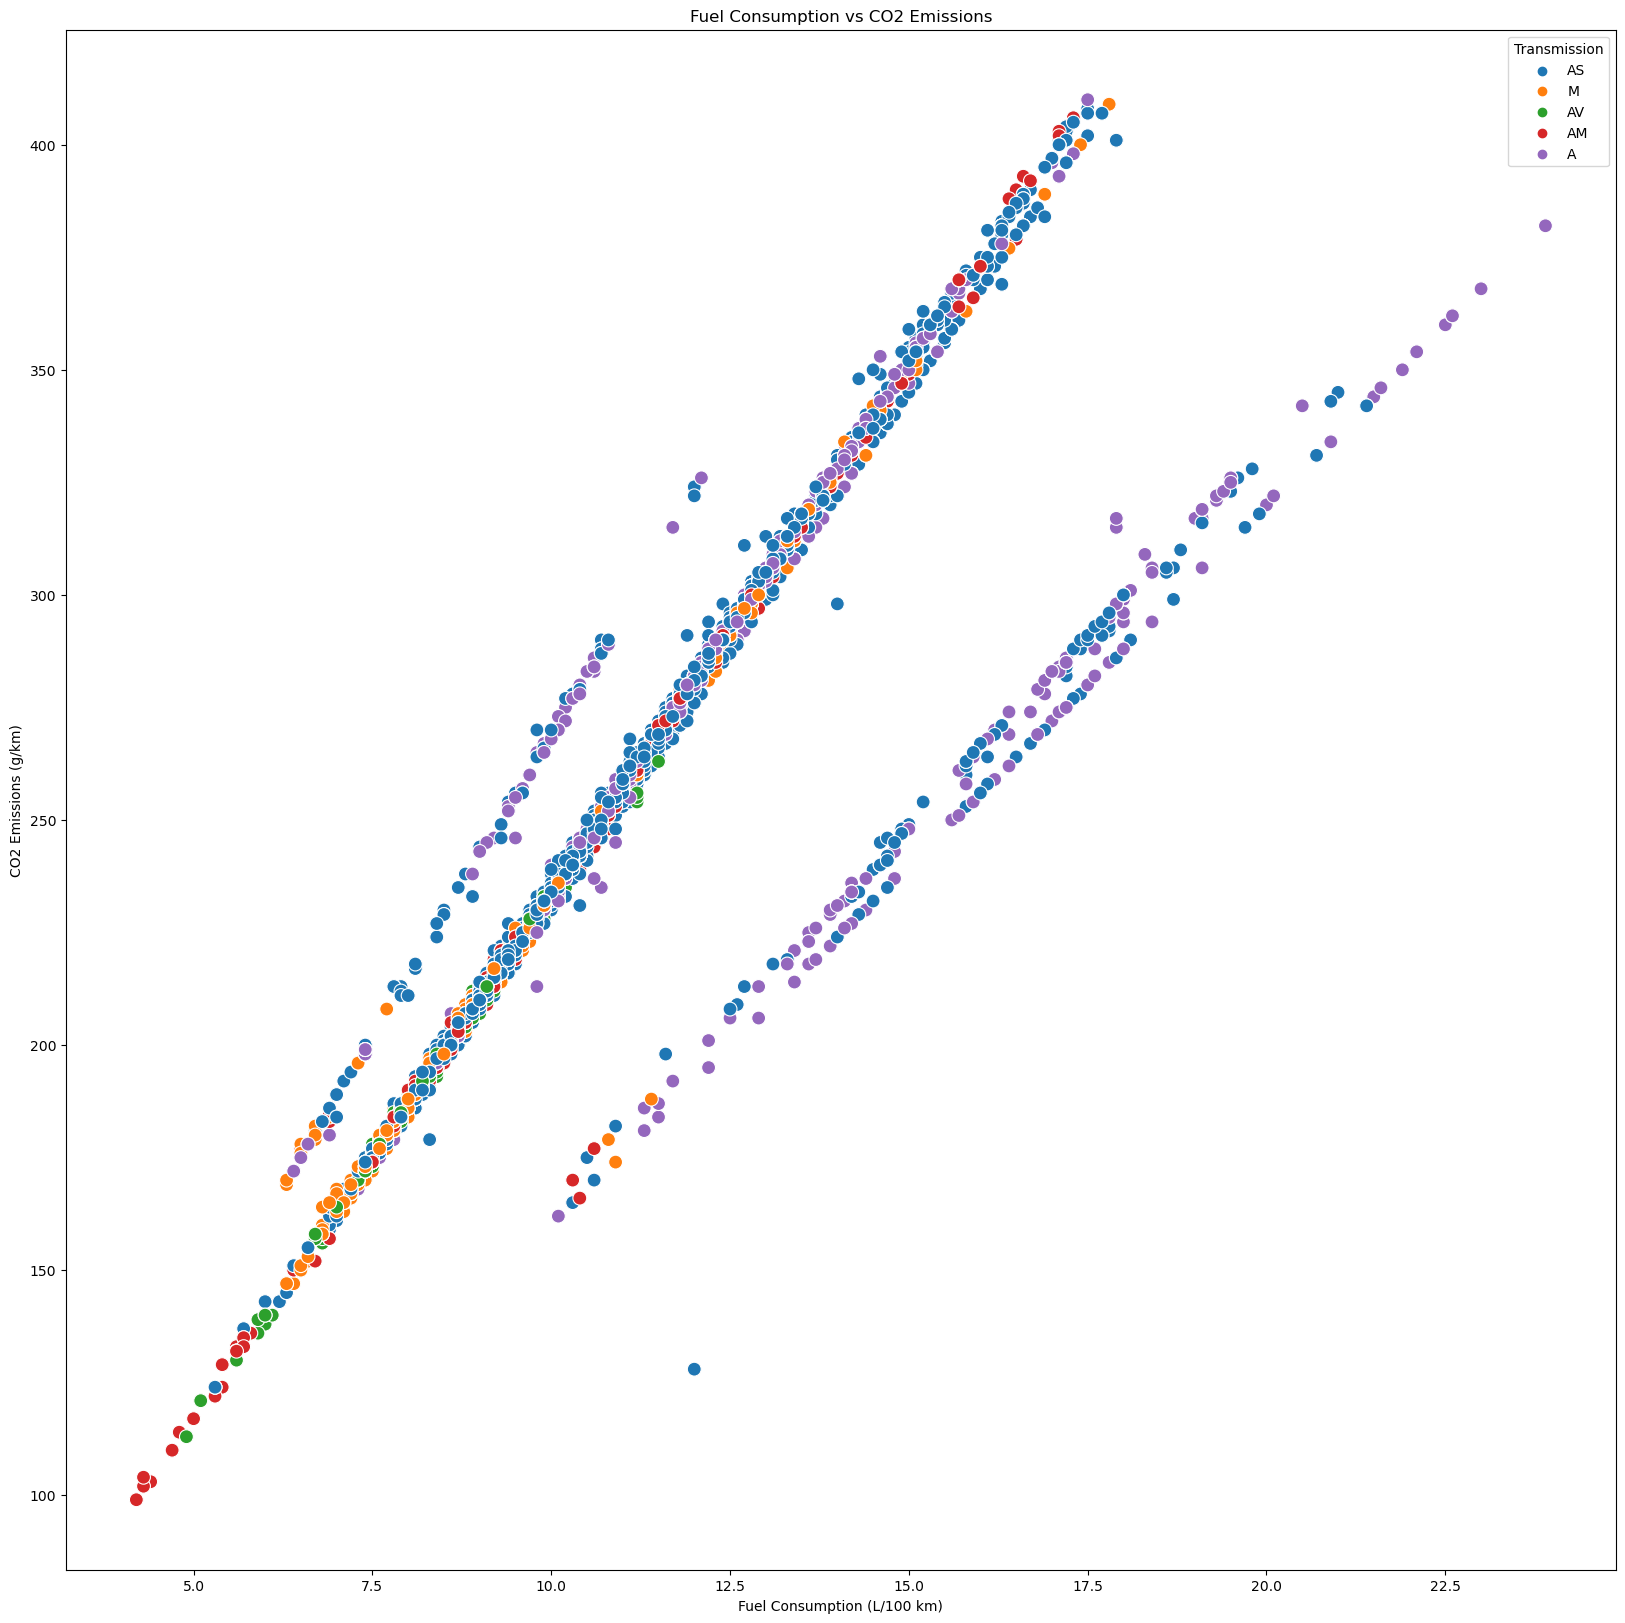

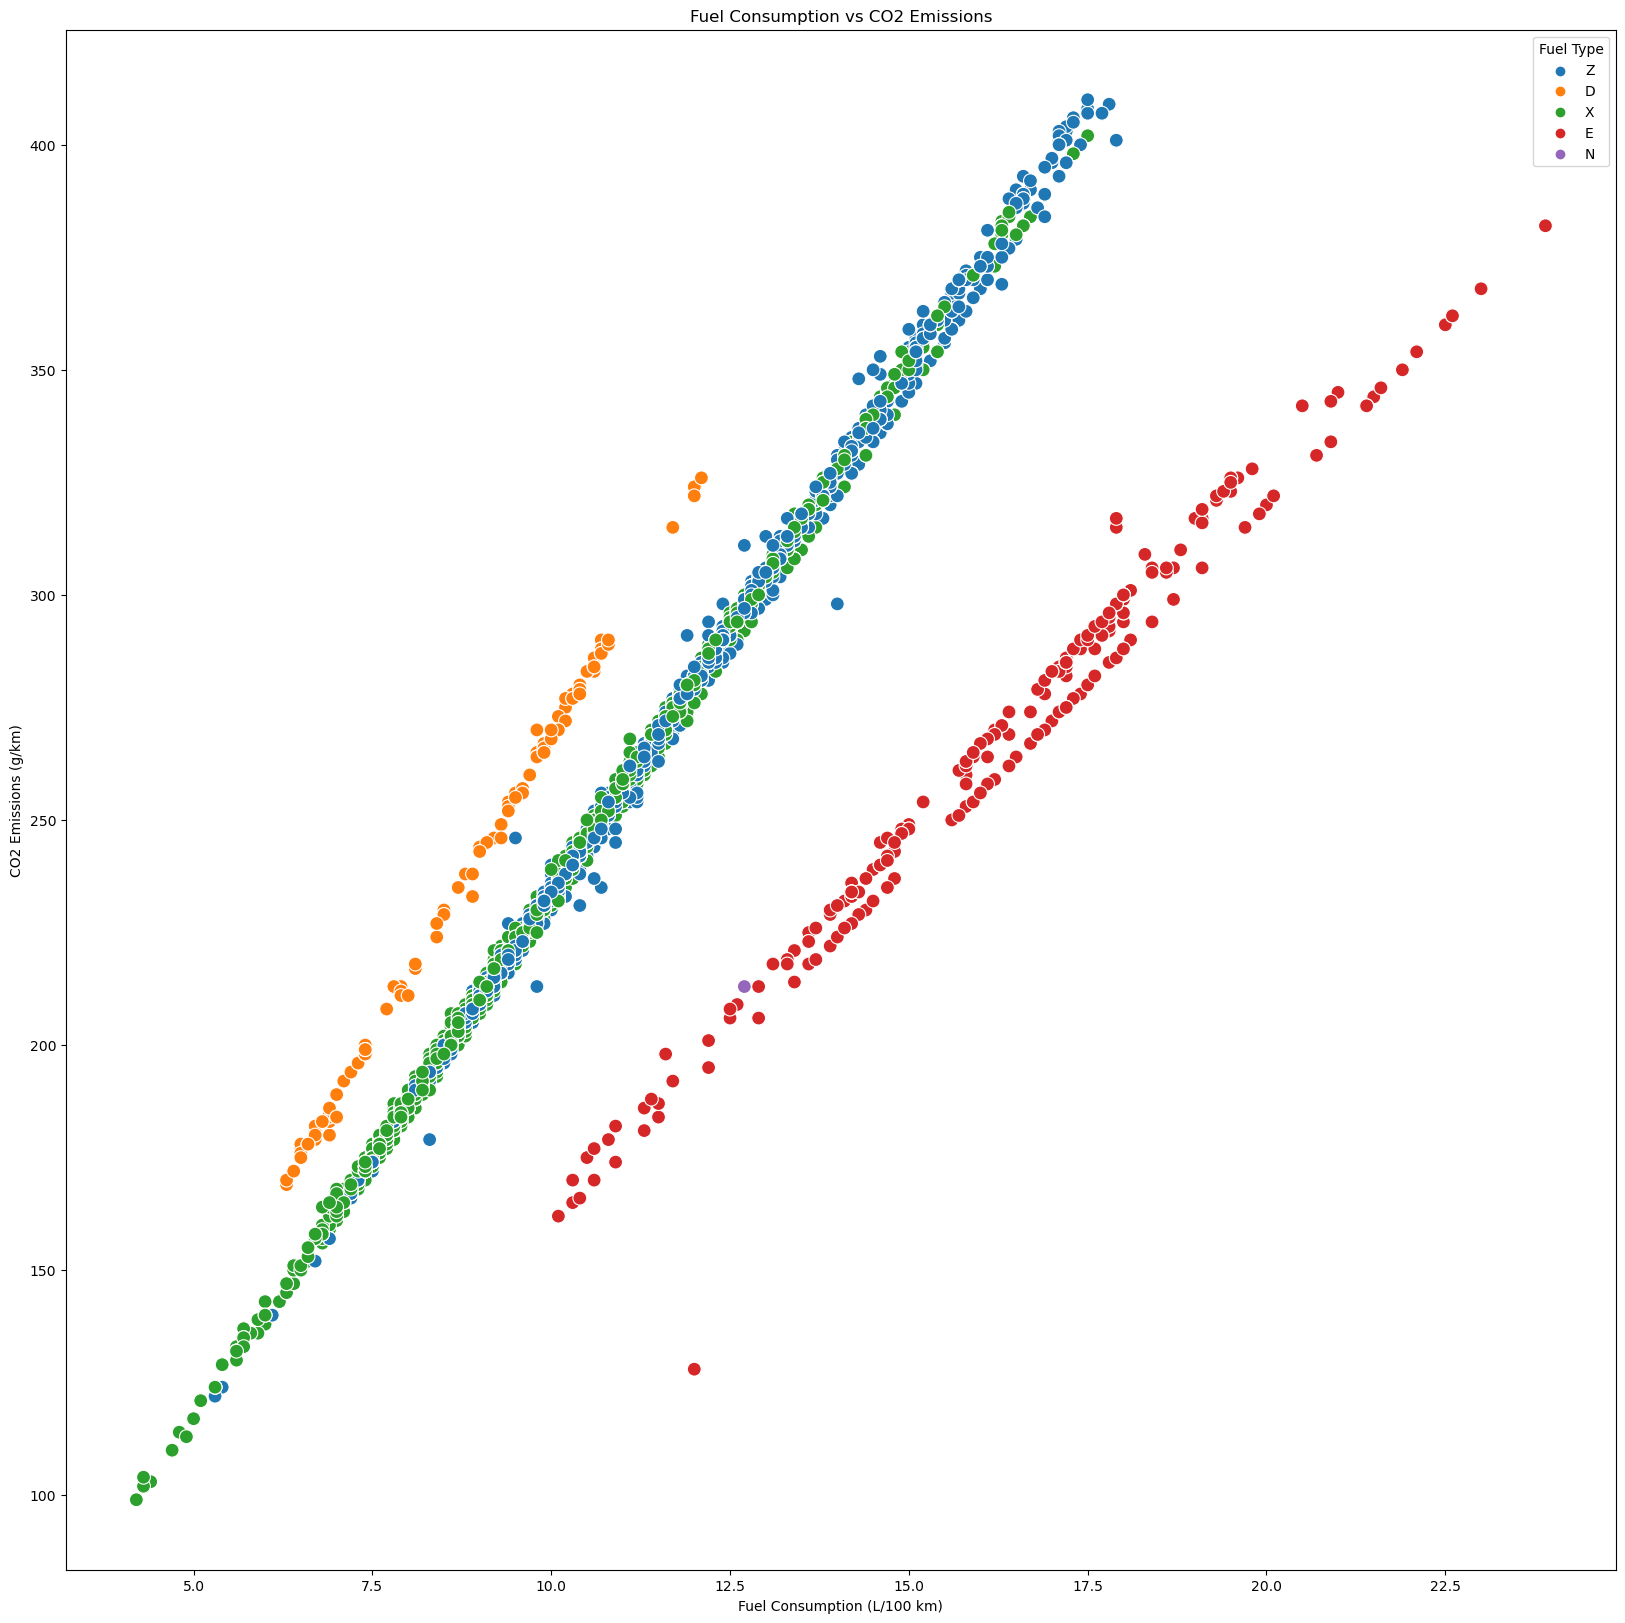

In [24]:
# Display the Joint Plots
for var in catDf:
    plt.figure(figsize=(20, 20))
    sb.scatterplot(x = "Fuel Consumption Comb (L/100 km)", y = "CO2 Emissions(g/km)", data = df_filtered2, hue = var, s = 100)
    plt.title('Fuel Consumption vs CO2 Emissions')
    plt.xlabel('Fuel Consumption (L/100 km)')
    plt.ylabel('CO2 Emissions (g/km)')
    plt.show()

There is no obvious pattern seen in the Joint Plots between CO2 Emissions and Fuel Consumption with the hue of Vehicle Class and Transmission.

On the other hand, we can observe clear clusters in the Joint Plot between CO2 Emissions and Fuel Consumption with the hue of Fuel Type. This suggests that Fuel Type may be a significant factor influencing the relationship between CO2 Emissions and Fuel Consumption. In general, for the same amount of Fuel Consumption, Disel(D) vehicles emits the most CO2 while Ethanol(E) vehicles emits the least CO2. 

However, there are no clear clusters between regular gasoline(X) vehicles, premium gasoline(Z) vehicles and Natural Gas(N) vehicles. The plot points for these Fuel Types are clustered together between Disel(D) vehicles and Ethanol(E) vehicles.

In [24]:
df_filtered2.to_csv('CO2 Emissions_Canada_cleaned_removed_outliers.csv')